In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder() 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Training_Data_Set.csv')

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.shape

(53515, 17)

In [5]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                1211
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power            1439
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count              7534
seat_count              8511
fuel_type                  0
Price                      0
dtype: int64

In [6]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [7]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [8]:
df['door_count'].fillna(df['door_count'].median(),inplace=True)

In [9]:
df['seat_count'].fillna(df['seat_count'].median(),inplace=True)

In [10]:
df.isnull().sum()

Id                         0
Maker                      0
model                      0
Location                   0
Distance                   0
Owner Type                 0
manufacture_year           0
Age of car                 0
engine_displacement        0
engine_power               0
body_type              49379
Vroom Audit Rating         0
transmission               0
door_count                 0
seat_count                 0
fuel_type                  0
Price                      0
dtype: int64

In [11]:
df.drop(columns=['body_type'],inplace=True)
# df.drop('body_type',axis=1) another way

In [12]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'Price'],
      dtype='object')

In [13]:
df_cat=df.select_dtypes(include=object)

In [14]:
df_num=df.select_dtypes(exclude=object)

In [15]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [16]:
df_num.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
door_count             float64
seat_count             float64
Price                  float64
dtype: object

In [17]:
df_num['engine_power']=df_num['engine_power'].astype(int)

In [18]:
df_num['door_count']=df_num['door_count'].astype(int)

In [19]:
df_num['seat_count']=df_num['seat_count'].astype(int)

In [20]:
df_num['Price']=df_num['Price'].astype(int)

In [21]:
df_num['Distance ']=df_num['Distance '].astype(int)

In [22]:
df_num.dtypes

Id                     int64
Distance               int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
engine_power           int64
Vroom Audit Rating     int64
door_count             int64
seat_count             int64
Price                  int64
dtype: object

In [23]:
# Label Encoding
df_cat['Maker']=le.fit_transform(df_cat['Maker'])

In [24]:
df_cat['model']=le.fit_transform(df_cat['model'])

In [25]:
df_cat['Location']=le.fit_transform(df_cat['Location'])

In [26]:
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])

In [27]:
df_cat['transmission']=le.fit_transform(df_cat['transmission'])

In [28]:
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])

In [29]:
df_cat.dtypes

Maker           int64
model           int64
Location        int64
Owner Type      int64
transmission    int64
fuel_type       int64
dtype: object

In [30]:
df2=pd.concat([df_cat,df_num],axis=1)
df2

Maker  model  Location  Owner Type  transmission  fuel_type     Id  \
0          6      8         0           2             1          1  25001   
1          2      9         0           3             1          1  25002   
2          1     18         5           3             0          0  25003   
3          5      6         9           3             1          1  25004   
4          1     20         6           1             0          0  25005   
...      ...    ...       ...         ...           ...        ...    ...   
53510      6      8         4           1             1          0  78511   
53511      6      8         1           1             1          0  78512   
53512      1     18        10           3             0          0  78513   
53513      7      1         6           3             1          0  78514   
53514      1     20         7           0             0          0  78515   

       Distance   manufacture_year  Age of car  engine_displacement  \
0          65520              1964          55                 1964   
1          27750              2012           7                 1242   
2          46000              2014           5                 1995   
3          43949              2011           8                 1618   
4          59524              2012           7                 2993   
...          ...               ...         ...                  ...   
53510      29334              2014           5                 1598   
53511     223631              2009          10                 1900   
53512      25500              2015           4                 1995   
53513    1195500              2011           8                11950   
53514     142000              2008          11                 2993   

       engine_power  Vroom Audit Rating  door_count  seat_count    Price  
0               147                   8           4           5   543764  
1                51                   6           4           4   401819  
2               105                   7           4           5  2392855  
3               140                   7           4           5   958606  
4               180                   7           4           5  3085561  
...             ...                 ...         ...         ...      ...  
53510            77                   4           4           5  1342996  
53511            77                   8           5           5   510732  
53512           105                   4           4           5  2008123  
53513            93                   5           4           5   874352  
53514           173                   4           5           5  1576610  

[53515 rows x 16 columns]

In [31]:
df2.dtypes

Maker                  int64
model                  int64
Location               int64
Owner Type             int64
transmission           int64
fuel_type              int64
Id                     int64
Distance               int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
engine_power           int64
Vroom Audit Rating     int64
door_count             int64
seat_count             int64
Price                  int64
dtype: object

In [32]:
df2.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count', 'Price'],
      dtype='object')

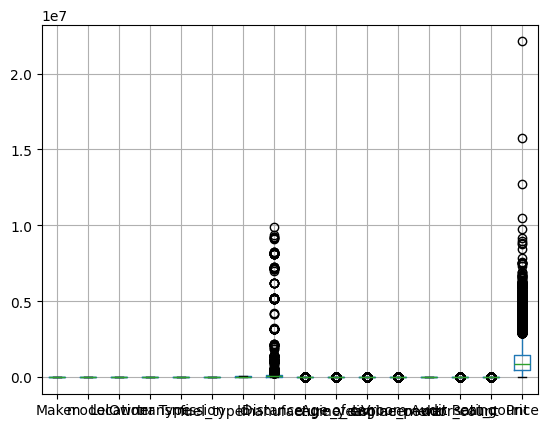

<Figure size 1000x1200 with 0 Axes>

In [33]:
df2.boxplot()
plt.figure(figsize=(10,12))
plt.show()

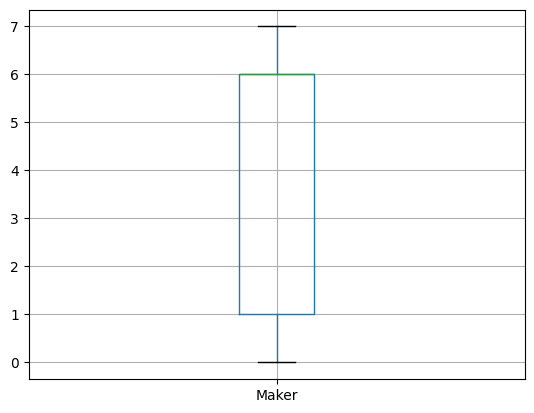

In [34]:
df2[['Maker']].boxplot()
plt.show()

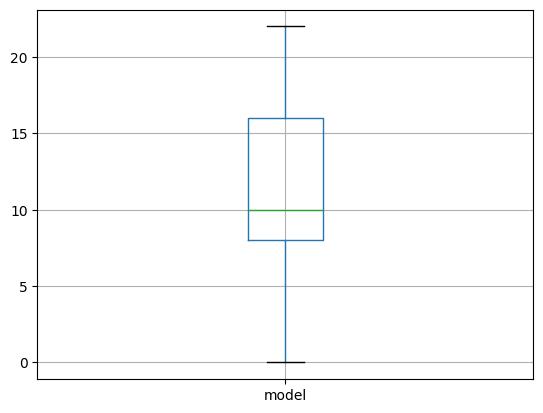

In [35]:
df2[['model']].boxplot()
plt.show()

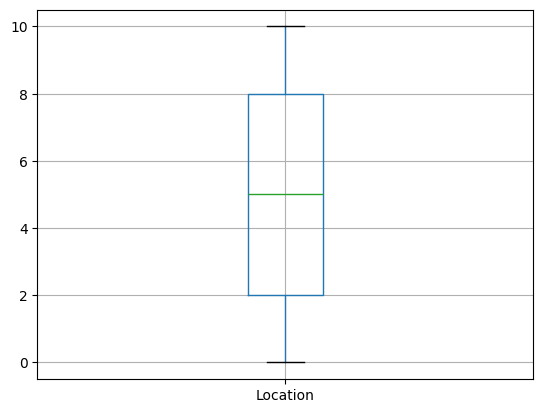

In [36]:
df2[['Location']].boxplot()
plt.show()

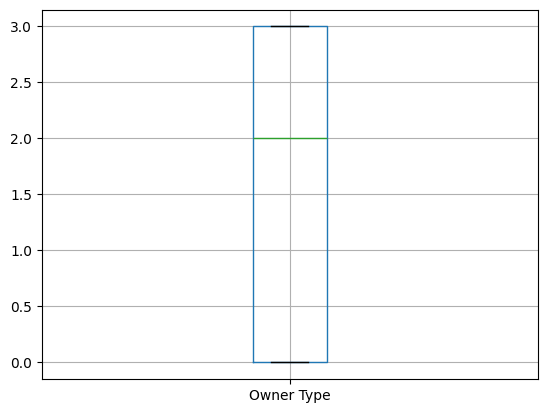

In [37]:
df2[['Owner Type']].boxplot()
plt.show()

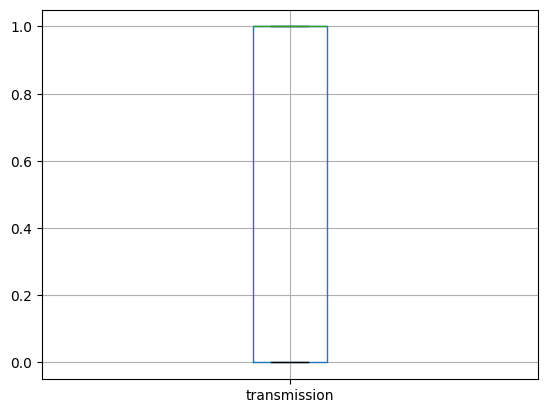

In [38]:
df2[['transmission']].boxplot()
plt.show()

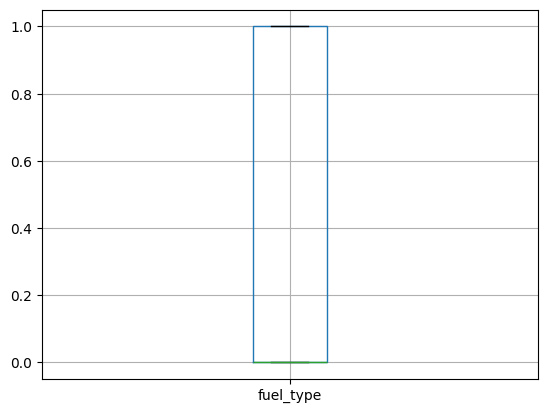

In [39]:
df2[['fuel_type']].boxplot()
plt.show()

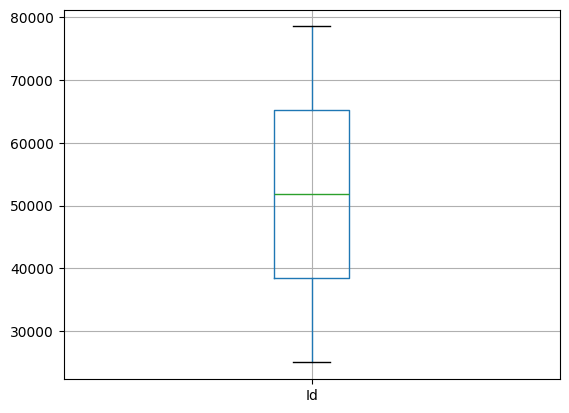

In [40]:
df2[['Id']].boxplot()
plt.show()

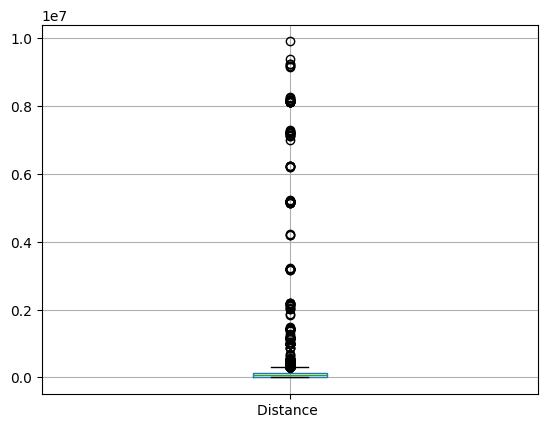

In [41]:
df2[['Distance ']].boxplot()
plt.show()

In [42]:
df.head(1)

Id  Maker    model   Location  Distance  Owner Type  manufacture_year  \
0  25001  skoda  octavia  Ahmedabad    65520.0     Second              1964   

   Age of car  engine_displacement  engine_power  Vroom Audit Rating  \
0          55                 1964         147.0                   8   

  transmission  door_count  seat_count fuel_type      Price  
0          man         4.0         5.0    petrol  543764.25

In [43]:
Q1=df2[['Distance ']].quantile(0.25)
Q1
Q3=df2[['Distance ']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_distance=(df2[['Distance ']][(df2[['Distance ']]>LL)&(df2[['Distance ']]<UL)])

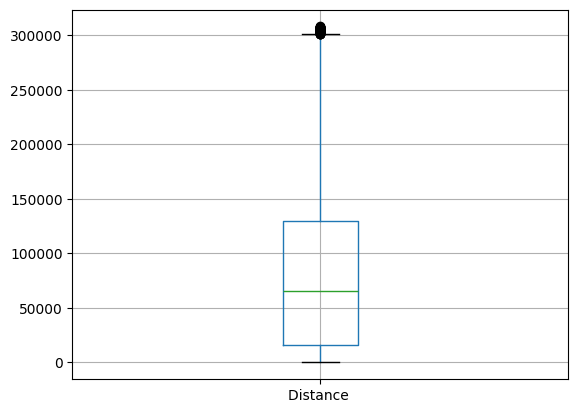

In [44]:
df2_distance.boxplot()
plt.show()

In [45]:
Q1=df2_distance.quantile(0.25)
Q1
Q3=df2_distance.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_distance1=(df2[['Distance ']][(df2_distance>LL)&(df2_distance<UL)])

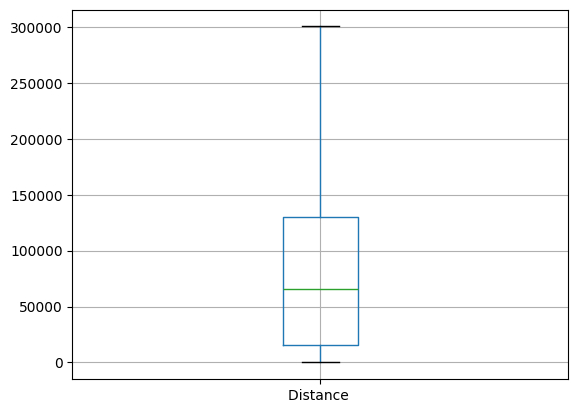

In [46]:
df2_distance1.boxplot()
plt.show()

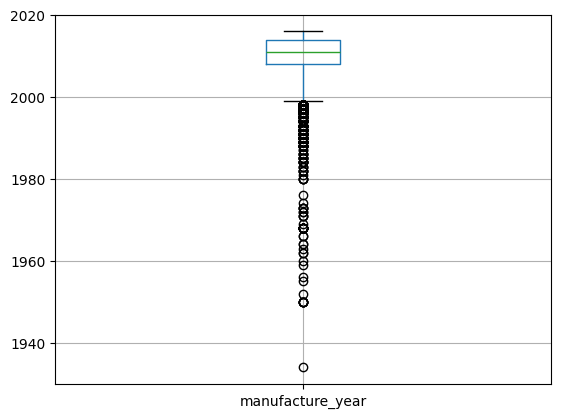

In [47]:
df2[['manufacture_year']].boxplot()
plt.show()

In [48]:
Q1=df2[['manufacture_year']].quantile(0.25)
Q1
Q3=df2[['manufacture_year']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_manufacture_year=(df2[['manufacture_year']][(df2[['manufacture_year']]>LL)&(df2[['manufacture_year']]<UL)])

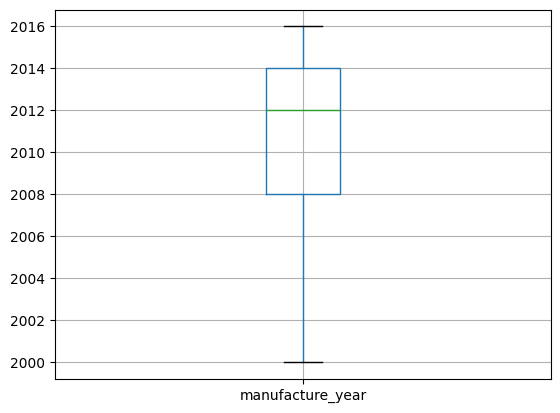

In [49]:
df2_manufacture_year.boxplot()
plt.show()

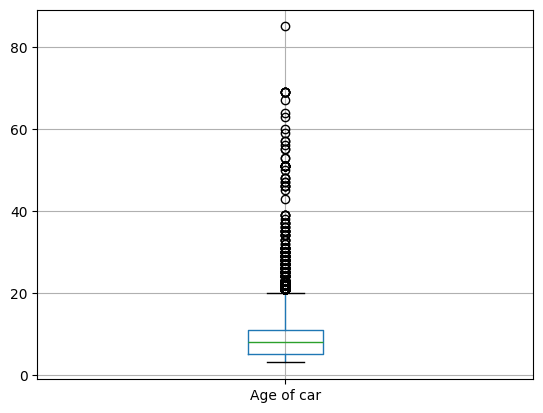

In [50]:
df2[['Age of car']].boxplot()
plt.show()

In [51]:
Q1=df2[['Age of car']].quantile(0.25)
Q1
Q3=df2[['Age of car']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_age_of_car=(df2[['Age of car']][(df2[['Age of car']]>LL)&(df2[['Age of car']]<UL)])

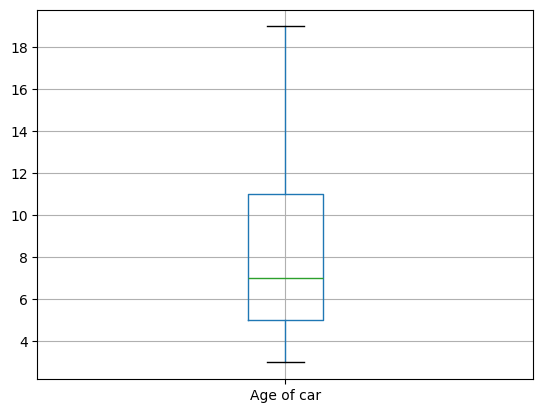

In [52]:
df2_age_of_car.boxplot()
plt.show()

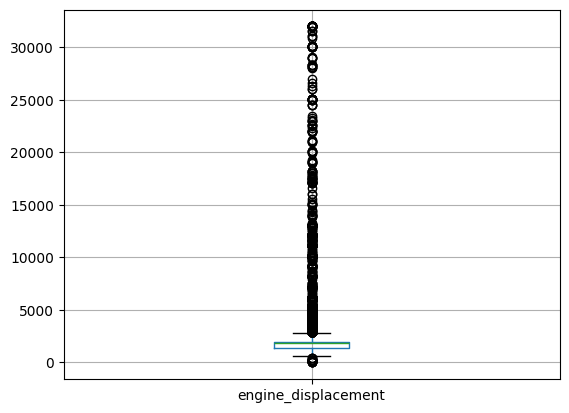

In [53]:
df2[['engine_displacement']].boxplot()
plt.show()

In [54]:
Q1=df2[['engine_displacement']].quantile(0.25)
Q1
Q3=df2[['engine_displacement']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_displacement=(df2[['engine_displacement']][(df2[['engine_displacement']]>LL)&(df2[['engine_displacement']]<UL)])

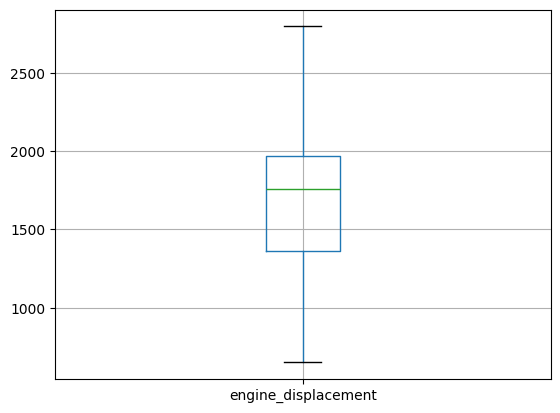

In [55]:
df2_engine_displacement.boxplot()
plt.show()

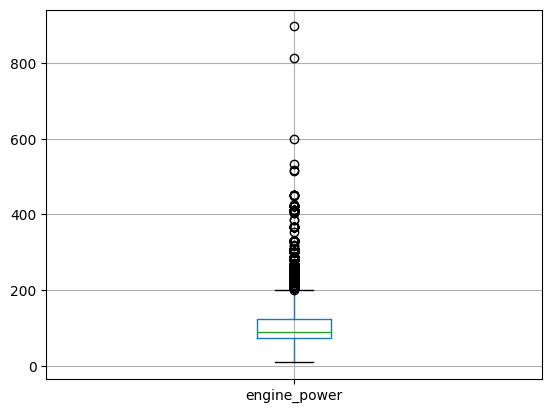

In [56]:
df2[['engine_power']].boxplot()
plt.show()

In [57]:
Q1=df2[['engine_power']].quantile(0.25)
Q1
Q3=df2[['engine_power']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_power=(df2[['engine_power']][(df2[['engine_power']]>LL)&(df2[['engine_power']]<UL)])

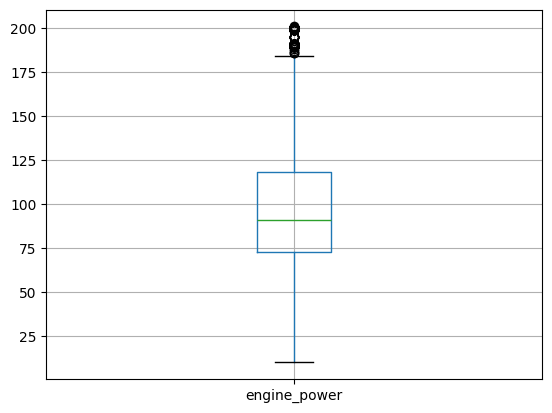

In [58]:
df2_engine_power.boxplot()
plt.show()

In [59]:
Q1=df2_engine_power.quantile(0.25)
Q1
Q3=df2_engine_power.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_power1=(df2_engine_power[(df2_engine_power>LL)&(df2_engine_power<UL)])

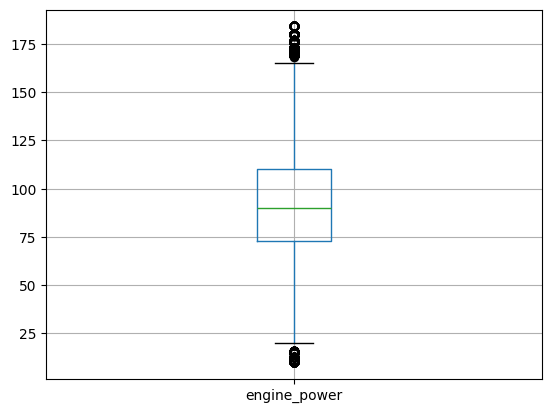

In [60]:
df2_engine_power1.boxplot()
plt.show()

In [61]:
Q1=df2_engine_power1.quantile(0.25)
Q1
Q3=df2_engine_power1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_power2=(df2_engine_power1[(df2_engine_power1>LL)&(df2_engine_power1<UL)])

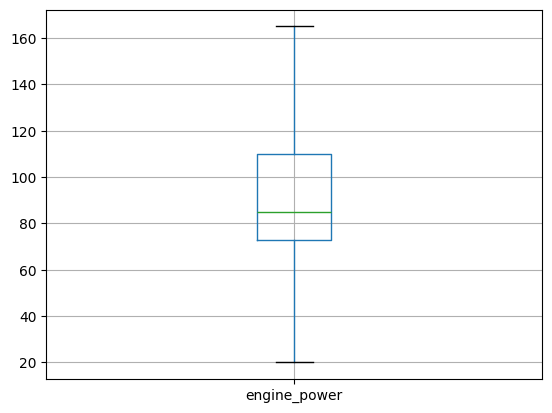

In [62]:
df2_engine_power2.boxplot()
plt.show()

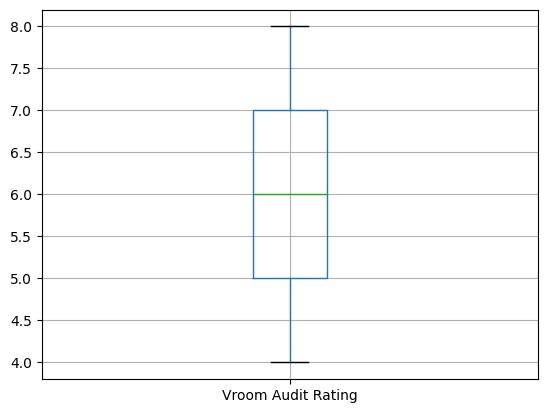

In [63]:
df2[['Vroom Audit Rating']].boxplot()
plt.show()

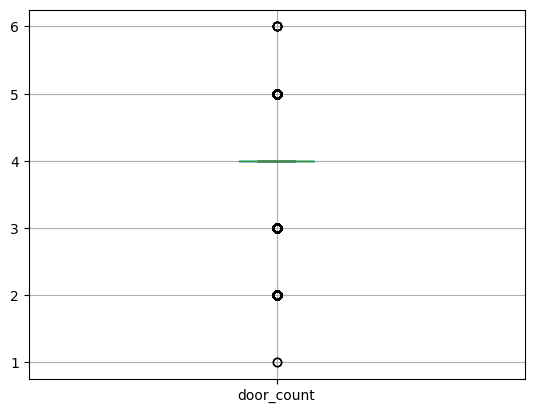

In [64]:
df2[['door_count']].boxplot()
plt.show()

In [65]:
Q1=df2[['door_count']].quantile(0.25)
Q1
Q3=df2[['door_count']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_door_count=(df2[['door_count']][(df2[['door_count']]>LL)&(df2[['door_count']]<UL)])

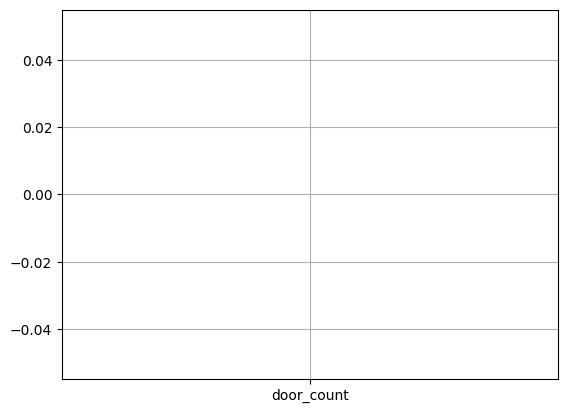

In [66]:
df2_door_count.boxplot()
plt.show()

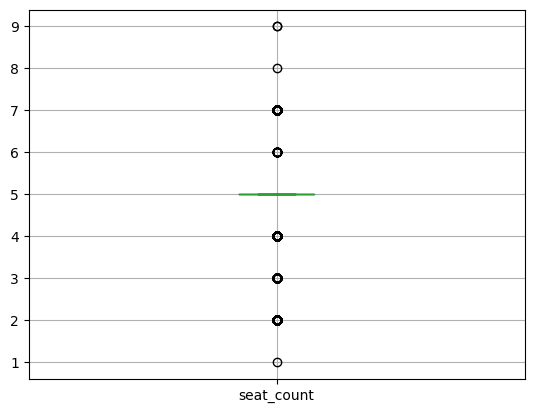

In [67]:
df2[['seat_count']].boxplot()
plt.show()

In [68]:
Q1=df2[['seat_count']].quantile(0.25)
Q1
Q3=df2[['seat_count']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_seat_count=(df2[['seat_count']][(df2[['seat_count']]>LL)&(df2[['seat_count']]<UL)])

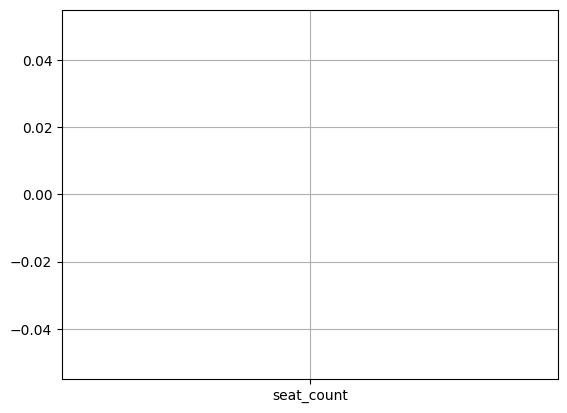

In [69]:
df2_seat_count.boxplot()
plt.show()

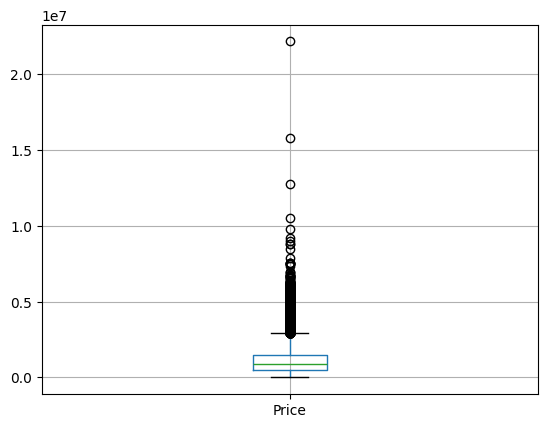

In [70]:
df2[['Price']].boxplot()
plt.show()

In [71]:
Q1=df2[['Price']].quantile(0.25)
Q1
Q3=df2[['Price']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price=(df2[['Price']][(df2[['Price']]>LL)&(df2[['Price']]<UL)])

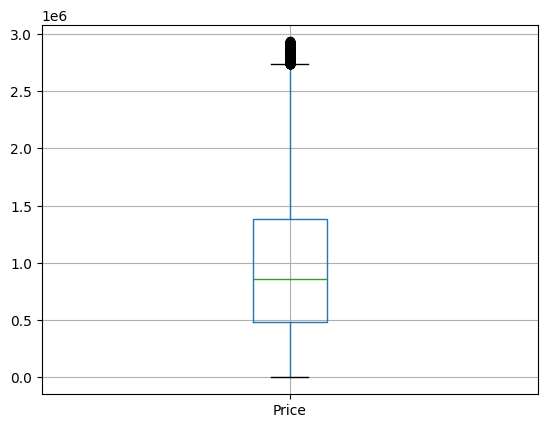

In [72]:
df2_Price.boxplot()
plt.show()

In [73]:
Q1=df2_Price.quantile(0.25)
Q1
Q3=df2_Price.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price1=(df2[['Price']][(df2_Price>LL)&(df2_Price<UL)])

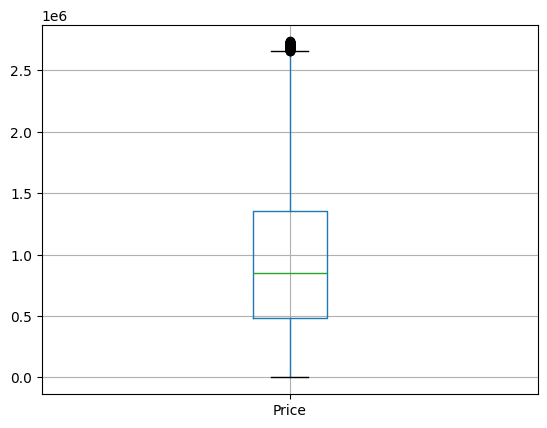

In [74]:
df2_Price1.boxplot()
plt.show()

In [75]:
Q1=df2_Price1.quantile(0.25)
Q1
Q3=df2_Price1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price2=(df2[['Price']][(df2_Price1>LL)&(df2_Price1<UL)])

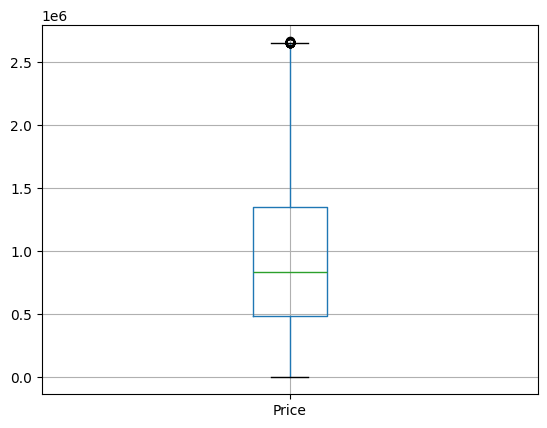

In [76]:
df2_Price2.boxplot()
plt.show()

In [77]:
Q1=df2_Price2.quantile(0.25)
Q1
Q3=df2_Price2.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price3=(df2[['Price']][(df2_Price2>LL)&(df2_Price2<UL)])

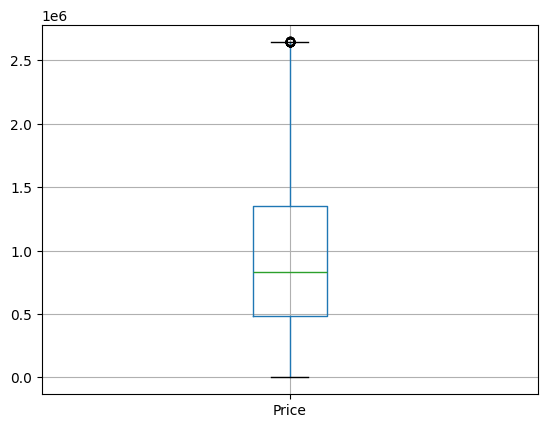

In [78]:
df2_Price3.boxplot()
plt.show()

In [79]:
Q1=df2_Price3.quantile(0.25)
Q1
Q3=df2_Price3.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price4=(df2[['Price']][(df2_Price3>LL)&(df2_Price3<UL)])

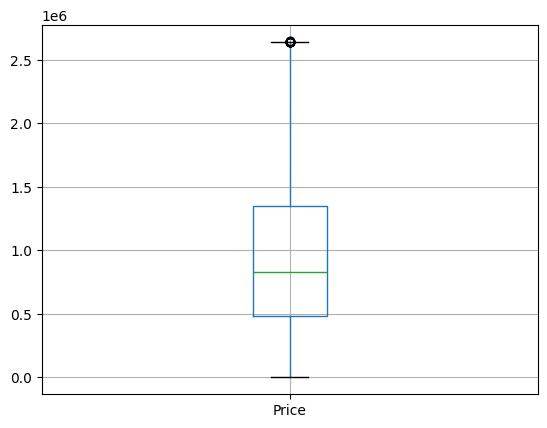

In [80]:
df2_Price4.boxplot()
plt.show()

In [81]:
Q1=df2_Price4.quantile(0.25)
Q1
Q3=df2_Price4.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price5=(df2[['Price']][(df2_Price4>LL)&(df2_Price4<UL)])

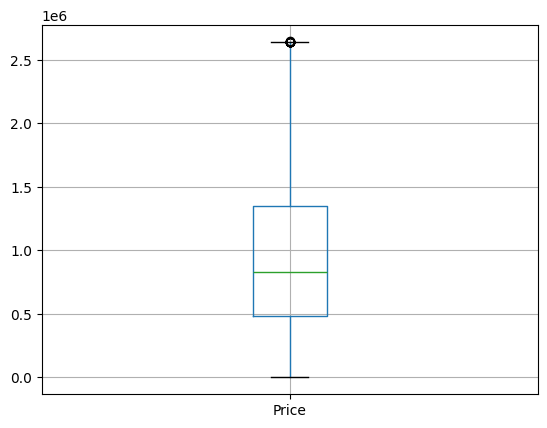

In [82]:
df2_Price5.boxplot()
plt.show()

In [83]:
Q1=df2_Price5.quantile(0.25)
Q1
Q3=df2_Price5.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price6=(df2[['Price']][(df2_Price5>LL)&(df2_Price5<UL)])

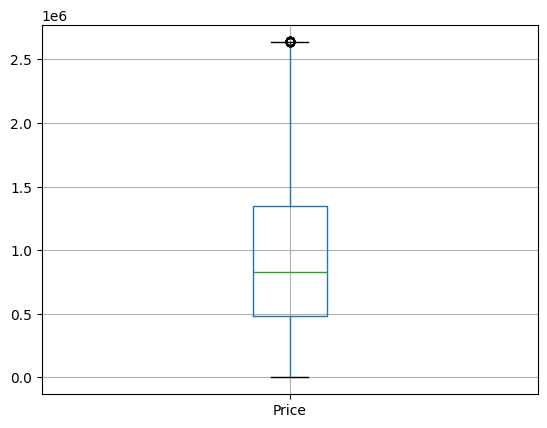

In [84]:
df2_Price6.boxplot()
plt.show()

In [85]:
Q1=df2_Price6.quantile(0.25)
Q1
Q3=df2_Price6.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price7=(df2[['Price']][(df2_Price6>LL)&(df2_Price6<UL)])

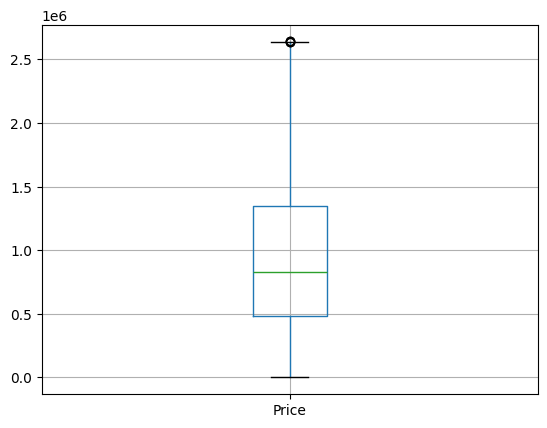

In [86]:
df2_Price7.boxplot()
plt.show()

In [87]:
Q1=df2_Price7.quantile(0.25)
Q1
Q3=df2_Price7.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price8=(df2[['Price']][(df2_Price7>LL)&(df2_Price7<UL)])

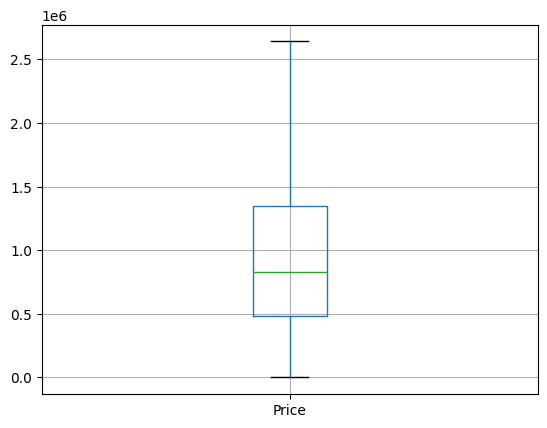

In [88]:
df2_Price8.boxplot()
plt.show()

In [89]:
df3=pd.concat([df2[['Maker']],df2[['model']],df2[['Location']],df2[['Owner Type']],df2[['transmission']],df2[['fuel_type']],df2[['Id']],df2_distance1,df2_manufacture_year,df2_age_of_car,df2_engine_displacement,df2_engine_power2,df2[['Vroom Audit Rating']],df2[['door_count']],df2[['seat_count']],df2_Price8],axis=1)
df3

Maker  model  Location  Owner Type  transmission  fuel_type     Id  \
0          6      8         0           2             1          1  25001   
1          2      9         0           3             1          1  25002   
2          1     18         5           3             0          0  25003   
3          5      6         9           3             1          1  25004   
4          1     20         6           1             0          0  25005   
...      ...    ...       ...         ...           ...        ...    ...   
53510      6      8         4           1             1          0  78511   
53511      6      8         1           1             1          0  78512   
53512      1     18        10           3             0          0  78513   
53513      7      1         6           3             1          0  78514   
53514      1     20         7           0             0          0  78515   

       Distance   manufacture_year  Age of car  engine_displacement  \
0        65520.0               NaN         NaN               1964.0   
1        27750.0            2012.0         7.0               1242.0   
2        46000.0            2014.0         5.0               1995.0   
3        43949.0            2011.0         8.0               1618.0   
4        59524.0            2012.0         7.0                  NaN   
...          ...               ...         ...                  ...   
53510    29334.0            2014.0         5.0               1598.0   
53511   223631.0            2009.0        10.0               1900.0   
53512    25500.0            2015.0         4.0               1995.0   
53513        NaN            2011.0         8.0                  NaN   
53514   142000.0            2008.0        11.0                  NaN   

       engine_power  Vroom Audit Rating  door_count  seat_count      Price  
0             147.0                   8           4           5   543764.0  
1              51.0                   6           4           4   401819.0  
2             105.0                   7           4           5  2392855.0  
3             140.0                   7           4           5   958606.0  
4               NaN                   7           4           5        NaN  
...             ...                 ...         ...         ...        ...  
53510          77.0                   4           4           5  1342996.0  
53511          77.0                   8           5           5   510732.0  
53512         105.0                   4           4           5  2008123.0  
53513          93.0                   5           4           5   874352.0  
53514           NaN                   4           5           5  1576610.0  

[53515 rows x 16 columns]

In [90]:
df3.isnull().sum()

Maker                     0
model                     0
Location                  0
Owner Type                0
transmission              0
fuel_type                 0
Id                        0
Distance                660
manufacture_year       1325
Age of car             1325
engine_displacement    5651
engine_power           5223
Vroom Audit Rating        0
door_count                0
seat_count                0
Price                  2961
dtype: int64

In [91]:
df3.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count', 'Price'],
      dtype='object')

In [92]:
df3.dropna(subset=['Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power','Price'],inplace=True)

In [93]:
df3.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Price                  0
dtype: int64

In [94]:
df3.dtypes

Maker                    int64
model                    int64
Location                 int64
Owner Type               int64
transmission             int64
fuel_type                int64
Id                       int64
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
Vroom Audit Rating       int64
door_count               int64
seat_count               int64
Price                  float64
dtype: object

In [95]:
df3['manufacture_year']=df3['manufacture_year'].astype(int)

In [96]:
df3['Distance ']=df3['Distance '].astype(int)

In [97]:
df3['Age of car']=df3['Age of car'].astype(int)

In [98]:
df3['engine_displacement']=df3['engine_displacement'].astype(int)

In [99]:
df3['engine_power']=df3['engine_power'].astype(int)

In [100]:
df3['Price']=df3['Price'].astype(int)

In [101]:
df3.shape

(44154, 16)

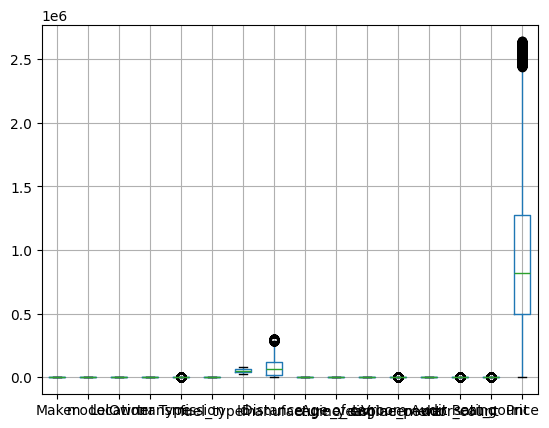

In [102]:
df3.boxplot()
plt.show()

In [103]:
df3_Price=df3[['Price']]

In [104]:
df3.drop(columns=['Price'],inplace=True)

In [105]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [106]:
df3_StandardScaler=pd.DataFrame(ss.fit_transform(df3),columns=df3.columns)

In [107]:
df3_StandardScaler.shape

(44154, 15)

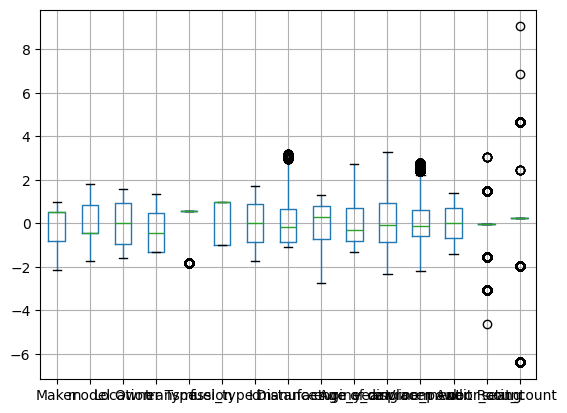

In [108]:
df3_StandardScaler.boxplot()
plt.show()

In [109]:
df3_StandardScaler.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [110]:
df3_StandardScaler.dtypes

Maker                  float64
model                  float64
Location               float64
Owner Type             float64
transmission           float64
fuel_type              float64
Id                     float64
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
Vroom Audit Rating     float64
door_count             float64
seat_count             float64
dtype: object

In [111]:
df3_StandardScaler.describe()

Maker         model      Location    Owner Type  transmission  \
count  4.415400e+04  4.415400e+04  4.415400e+04  4.415400e+04  4.415400e+04   
mean  -2.679380e-17  9.993365e-17  7.012253e-17 -1.126466e-17 -6.742705e-17   
std    1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00  1.000011e+00   
min   -2.139856e+00 -1.749549e+00 -1.584829e+00 -1.340337e+00 -1.846767e+00   
25%   -8.108913e-01 -4.505162e-01 -9.523440e-01 -1.340337e+00  5.414868e-01   
50%    5.180739e-01 -4.505162e-01 -3.616941e-03 -4.458608e-01  5.414868e-01   
75%    5.180739e-01  8.485169e-01  9.451102e-01  4.486159e-01  5.414868e-01   
max    9.610623e-01  1.822792e+00  1.577595e+00  1.343093e+00  5.414868e-01   

          fuel_type            Id     Distance   manufacture_year  \
count  4.415400e+04  4.415400e+04  4.415400e+04      4.415400e+04   
mean   4.087463e-17 -2.059824e-17  1.319575e-17      2.297991e-15   
std    1.000011e+00  1.000011e+00  1.000011e+00      1.000011e+00   
min   -1.021845e+00 -1.731136e+00 -1.087807e+00     -2.746937e+00   
25%   -1.021845e+00 -8.652297e-01 -8.750473e-01     -7.142822e-01   
50%    9.786223e-01 -1.654412e-03 -1.937336e-01      3.020451e-01   
75%    9.786223e-01  8.657413e-01  6.583979e-01      8.102088e-01   
max    9.786223e-01  1.733914e+00  3.174694e+00      1.318372e+00   

         Age of car  engine_displacement  engine_power  Vroom Audit Rating  \
count  4.415400e+04         4.415400e+04  4.415400e+04        4.415400e+04   
mean  -5.825440e-17        -3.097782e-16  6.630059e-17        2.611792e-16   
std    1.000011e+00         1.000011e+00  1.000011e+00        1.000011e+00   
min   -1.318372e+00        -2.317797e+00 -2.193070e+00       -1.404863e+00   
25%   -8.102088e-01        -8.607281e-01 -5.823113e-01       -7.005253e-01   
50%   -3.020451e-01        -9.990808e-02 -1.430134e-01        3.812491e-03   
75%    7.142822e-01         9.332350e-01  5.891498e-01        7.081503e-01   
max    2.746937e+00         3.269037e+00  2.785639e+00        1.412488e+00   

         door_count    seat_count  
count  4.415400e+04  4.415400e+04  
mean   9.011730e-17  4.037577e-16  
std    1.000011e+00  1.000011e+00  
min   -4.616839e+00 -6.401705e+00  
25%   -3.064113e-02  2.254375e-01  
50%   -3.064113e-02  2.254375e-01  
75%   -3.064113e-02  2.254375e-01  
max    3.026824e+00  9.061627e+00

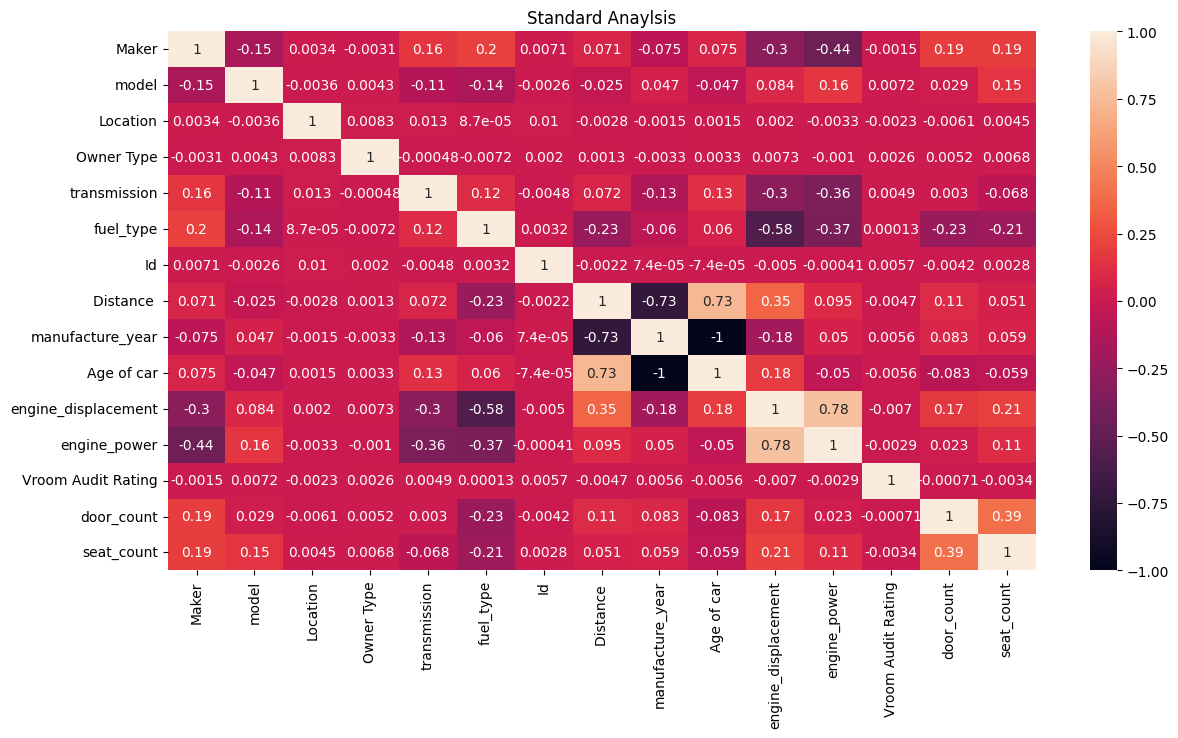

In [112]:
plt.figure(figsize=(14,7))
sns.heatmap(df3_StandardScaler.corr(),annot=True)
plt.title('Standard Anaylsis')
plt.show()

In [113]:
df3_StandardScaler.corr()

Maker     model  Location  Owner Type  transmission  \
Maker                1.000000 -0.150393  0.003419   -0.003083      0.160805   
model               -0.150393  1.000000 -0.003611    0.004295     -0.111524   
Location             0.003419 -0.003611  1.000000    0.008266      0.012632   
Owner Type          -0.003083  0.004295  0.008266    1.000000     -0.000480   
transmission         0.160805 -0.111524  0.012632   -0.000480      1.000000   
fuel_type            0.195983 -0.144764  0.000087   -0.007224      0.115740   
Id                   0.007100 -0.002589  0.010249    0.002020     -0.004824   
Distance             0.070785 -0.024969 -0.002821    0.001272      0.072080   
manufacture_year    -0.074973  0.047207 -0.001455   -0.003270     -0.127244   
Age of car           0.074973 -0.047207  0.001455    0.003270      0.127244   
engine_displacement -0.299779  0.084361  0.001956    0.007271     -0.297633   
engine_power        -0.438629  0.159928 -0.003281   -0.000999     -0.362710   
Vroom Audit Rating  -0.001509  0.007222 -0.002337    0.002570      0.004945   
door_count           0.189203  0.029496 -0.006089    0.005230      0.003031   
seat_count           0.187903  0.150940  0.004549    0.006805     -0.067586   

                     fuel_type        Id  Distance   manufacture_year  \
Maker                 0.195983  0.007100   0.070785         -0.074973   
model                -0.144764 -0.002589  -0.024969          0.047207   
Location              0.000087  0.010249  -0.002821         -0.001455   
Owner Type           -0.007224  0.002020   0.001272         -0.003270   
transmission          0.115740 -0.004824   0.072080         -0.127244   
fuel_type             1.000000  0.003168  -0.227588         -0.060199   
Id                    0.003168  1.000000  -0.002178          0.000074   
Distance             -0.227588 -0.002178   1.000000         -0.727174   
manufacture_year     -0.060199  0.000074  -0.727174          1.000000   
Age of car            0.060199 -0.000074   0.727174         -1.000000   
engine_displacement  -0.584991 -0.004978   0.346987         -0.182037   
engine_power         -0.373399 -0.000415   0.094744          0.049554   
Vroom Audit Rating    0.000130  0.005717  -0.004662          0.005641   
door_count           -0.231200 -0.004244   0.108346          0.082912   
seat_count           -0.211711  0.002763   0.051316          0.058937   

                     Age of car  engine_displacement  engine_power  \
Maker                  0.074973            -0.299779     -0.438629   
model                 -0.047207             0.084361      0.159928   
Location               0.001455             0.001956     -0.003281   
Owner Type             0.003270             0.007271     -0.000999   
transmission           0.127244            -0.297633     -0.362710   
fuel_type              0.060199            -0.584991     -0.373399   
Id                    -0.000074            -0.004978     -0.000415   
Distance               0.727174             0.346987      0.094744   
manufacture_year      -1.000000            -0.182037      0.049554   
Age of car             1.000000             0.182037     -0.049554   
engine_displacement    0.182037             1.000000      0.779488   
engine_power          -0.049554             0.779488      1.000000   
Vroom Audit Rating    -0.005641            -0.007019     -0.002910   
door_count            -0.082912             0.169408      0.022552   
seat_count            -0.058937             0.208921      0.110989   

                     Vroom Audit Rating  door_count  seat_count  
Maker                         -0.001509    0.189203    0.187903  
model                          0.007222    0.029496    0.150940  
Location                      -0.002337   -0.006089    0.004549  
Owner Type                     0.002570    0.005230    0.006805  
transmission                   0.004945    0.003031   -0.067586  
fuel_type                      0.000130   -0.231200   -0.211711  
Id     

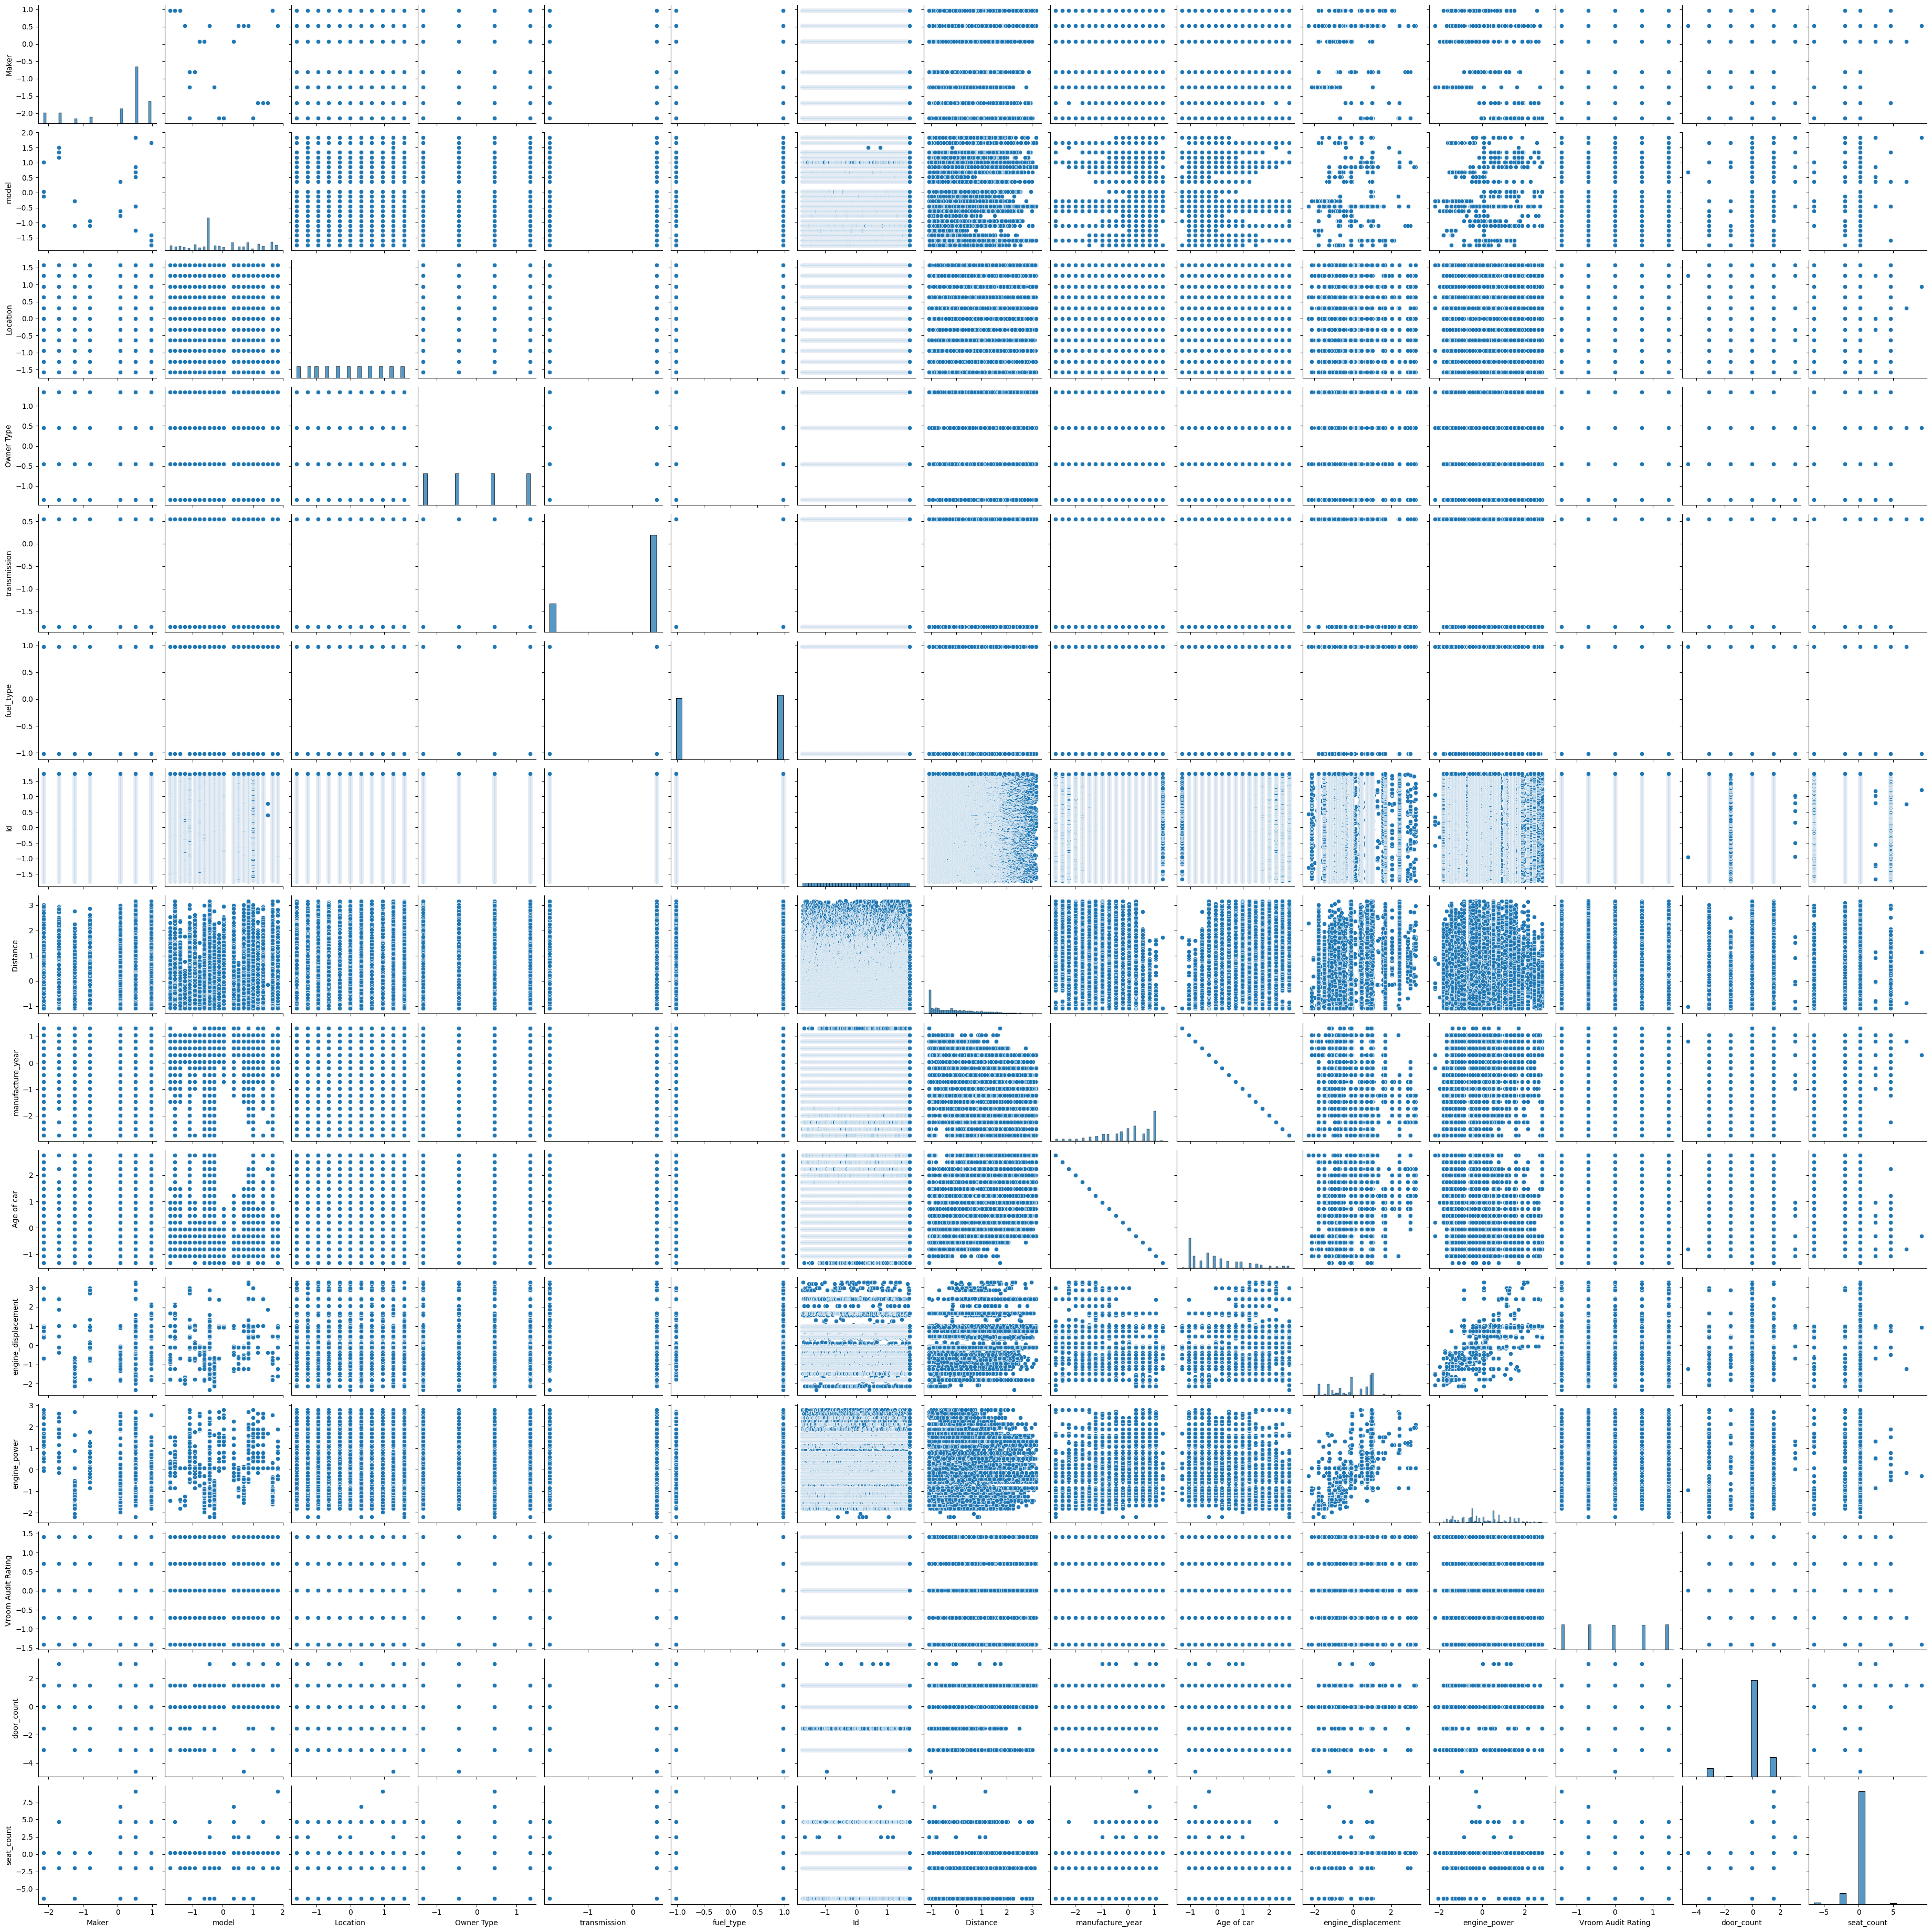

In [114]:
sns.pairplot(data=df3_StandardScaler)
plt.show()

In [115]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [116]:
df3_StandardScaler.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [117]:
x=df3_StandardScaler
y=df3_Price

In [118]:
model.fit(x,y)

LinearRegression()

In [119]:
model.coef_

array([[-1.10064499e+05,  3.44780352e+04,  1.61138841e+02,
         7.60630567e+02, -6.32096758e+04, -8.48639954e+04,
         1.19698470e+03, -1.71027510e+05,  1.00266204e+05,
        -1.00266204e+05,  2.76340543e+04,  2.08696058e+05,
        -4.89726879e+02, -1.11438801e+04,  2.29441449e+04]])

In [120]:
model.intercept_

array([934915.65063188])

In [121]:
model.score(x,y)

0.8264920750910847

In [122]:
y_predict=pd.DataFrame(model.predict(x),columns=['y_predicted'])

In [123]:
y_predict

y_predicted
0      7.583901e+05
1      1.757466e+06
2      1.265002e+06
3      1.475074e+06
4      1.052786e+06
...             ...
44149  3.946537e+05
44150  8.310122e+05
44151  1.106214e+06
44152  3.849813e+05
44153  1.863585e+06

[44154 rows x 1 columns]

In [124]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predict)

np.float64(54391020260.90689)

In [125]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predict)

np.float64(179238.74311902723)

## Text Data

In [126]:
df=pd.read_csv('Test_Data_Set (5).csv')

In [127]:
df.duplicated().sum()

np.int64(0)

In [128]:
df.shape

(5615, 16)

In [129]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                128
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power            168
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count              806
seat_count              891
fuel_type                 0
dtype: int64

In [130]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [131]:
df['door_count'].fillna(df['door_count'].median(),inplace=True)

In [132]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [133]:
df['seat_count'].fillna(df['seat_count'].median(),inplace=True)

In [134]:
df.isnull().sum()

Id                        0
Maker                     0
model                     0
Location                  0
Distance                  0
Owner Type                0
manufacture_year          0
Age of car                0
engine_displacement       0
engine_power              0
body_type              5193
Vroom Audit Rating        0
transmission              0
door_count                0
seat_count                0
fuel_type                 0
dtype: int64

In [135]:
df.drop(columns=['body_type'],inplace=True)

In [136]:
df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
dtype: int64

In [137]:
df_cat=df.select_dtypes(include=object)

In [138]:
df_num=df.select_dtypes(exclude=object)

In [139]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [140]:
df_num.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
door_count             float64
seat_count             float64
dtype: object

In [141]:
df_num['Distance ']=df_num['Distance '].astype(int)
df_num['engine_power']=df_num['engine_power'].astype(int)
df_num['door_count']=df_num['door_count'].astype(int)
df_num['seat_count']=df_num['seat_count'].astype(int)

In [142]:
df_num.dtypes

Id                     int64
Distance               int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
engine_power           int64
Vroom Audit Rating     int64
door_count             int64
seat_count             int64
dtype: object

In [143]:
# Label Encoding
df_cat['Maker']=le.fit_transform(df_cat['Maker'])
df_cat['model']=le.fit_transform(df_cat['model'])
df_cat['Location']=le.fit_transform(df_cat['Location'])
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])
df_cat['transmission']=le.fit_transform(df_cat['transmission'])
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])

In [144]:
df_cat.dtypes

Maker           int64
model           int64
Location        int64
Owner Type      int64
transmission    int64
fuel_type       int64
dtype: object

In [146]:
df2=pd.concat([df_cat,df_num],axis=1)
df2

Maker  model  Location  Owner Type  transmission  fuel_type     Id  \
0         6      8         9           0             1          1  11001   
1         6     14         3           3             1          0  11002   
2         6      8         3           2             1          0  11003   
3         0     10         4           1             0          0  11004   
4         0     17         2           3             0          1  11005   
...     ...    ...       ...         ...           ...        ...    ...   
5610      6      8         9           0             1          0  16611   
5611      6     16         0           0             1          0  16612   
5612      6      8         1           2             1          0  16613   
5613      5     13         6           3             1          1  16614   
5614      3      5         6           2             1          1  16615   

      Distance   manufacture_year  Age of car  engine_displacement  \
0        150000              2007          12                 1595   
1         29376              2014           5                 1598   
2         30563              2014           5                 1968   
3          8650              2015           4                 1968   
4          6400              2015           4                 1984   
...         ...               ...         ...                  ...   
5610     149976              2011           8                 1968   
5611     332000              2005          14                 1896   
5612     230800              2005          14                 1896   
5613      63480              2011           8                 1997   
5614      75000              2011           8                 1396   

      engine_power  Vroom Audit Rating  door_count  seat_count  
0               75                   5           4           5  
1               77                   4           4           5  
2              110                   5           5           5  
3              110                   8           4           5  
4              169                   4           2           5  
...            ...                 ...         ...         ...  
5610           103                   8           4           5  
5611            96                   6           4           5  
5612            77                   7           5           5  
5613           104                   5           4           7  
5614            80                   4           4           5  

[5615 rows x 15 columns]

In [147]:
df2.dtypes

Maker                  int64
model                  int64
Location               int64
Owner Type             int64
transmission           int64
fuel_type              int64
Id                     int64
Distance               int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
engine_power           int64
Vroom Audit Rating     int64
door_count             int64
seat_count             int64
dtype: object

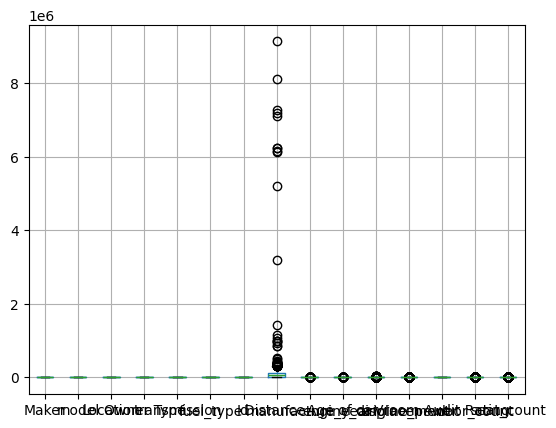

<Figure size 1000x1200 with 0 Axes>

In [149]:
df2.boxplot()
plt.figure(figsize=(10,12))
plt.show()

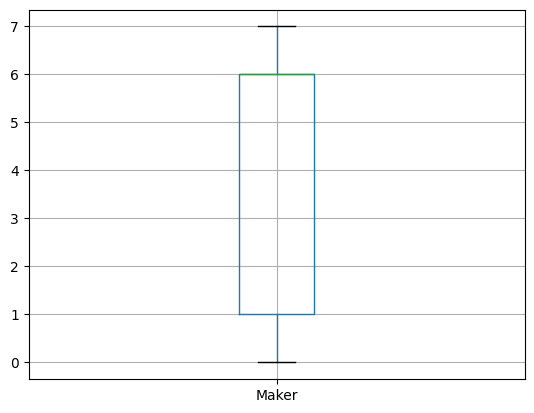

In [150]:
df2[['Maker']].boxplot()
plt.show()

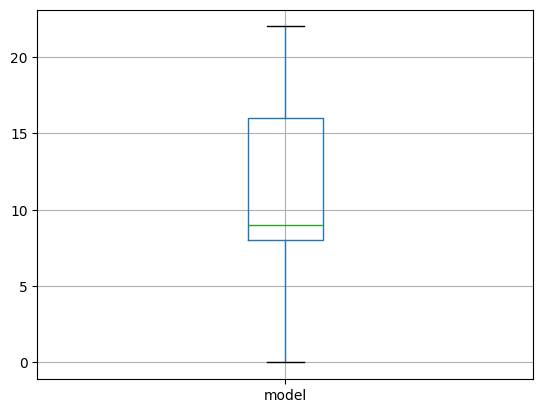

In [151]:
df2[['model']].boxplot()
plt.show()

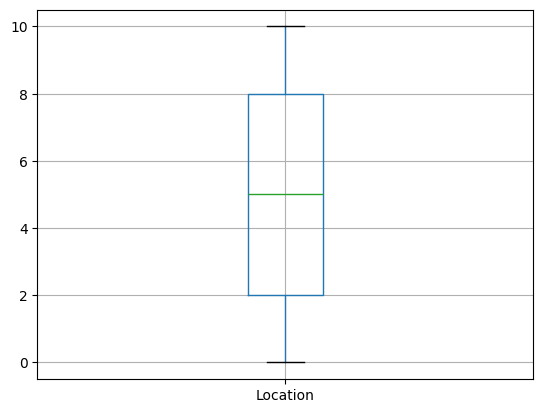

In [152]:
df2[['Location']].boxplot()
plt.show()

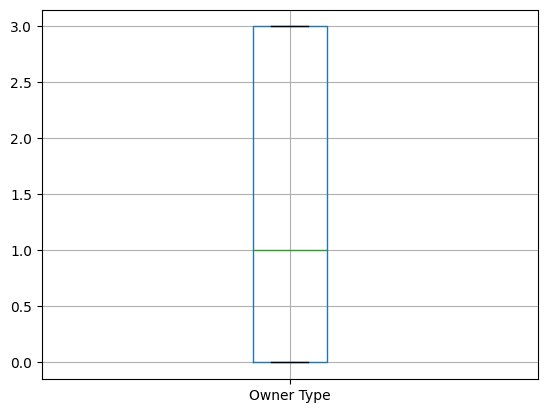

In [153]:
df2[['Owner Type']].boxplot()
plt.show()

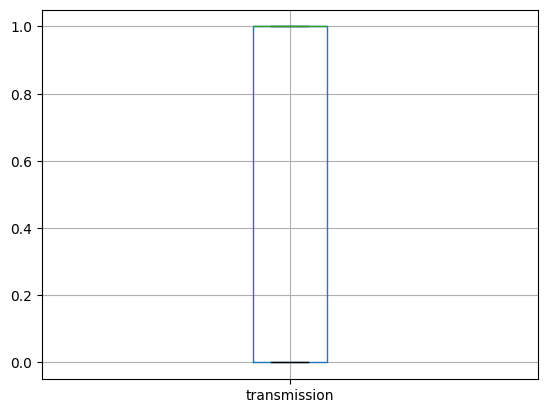

In [154]:
df2[['transmission']].boxplot()
plt.show()

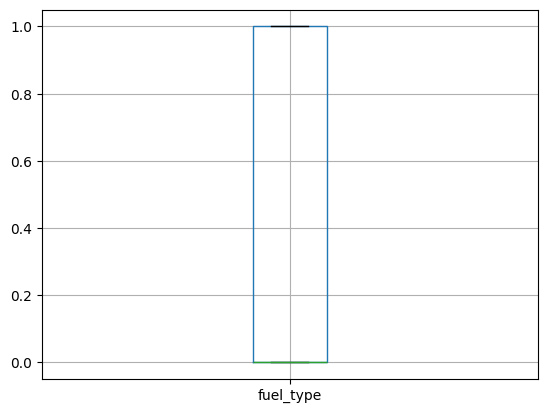

In [155]:
df2[['fuel_type']].boxplot()
plt.show()

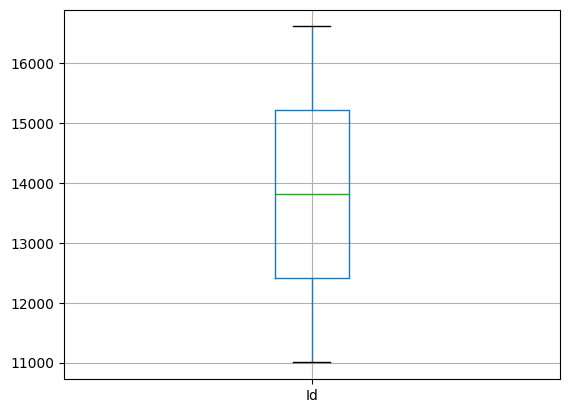

In [156]:
df2[['Id']].boxplot()
plt.show()

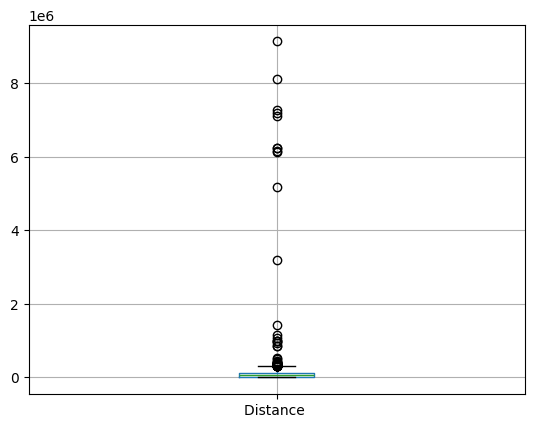

In [157]:
df2[['Distance ']].boxplot()
plt.show()

In [158]:
Q1=df2[['Distance ']].quantile(0.25)
Q1
Q3=df2[['Distance ']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_distance=(df2[['Distance ']][(df2[['Distance ']]>LL)&(df2[['Distance ']]<UL)])

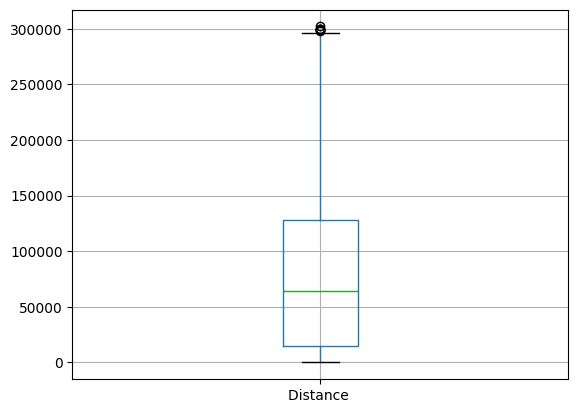

In [159]:
df2_distance.boxplot()
plt.show()

In [160]:
Q1=df2_distance.quantile(0.25)
Q1
Q3=df2_distance.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_distance1=(df2[['Distance ']][(df2_distance>LL)&(df2_distance<UL)])

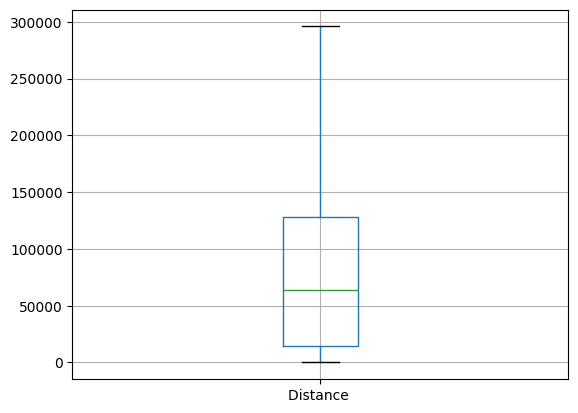

In [161]:
df2_distance1.boxplot()
plt.show()

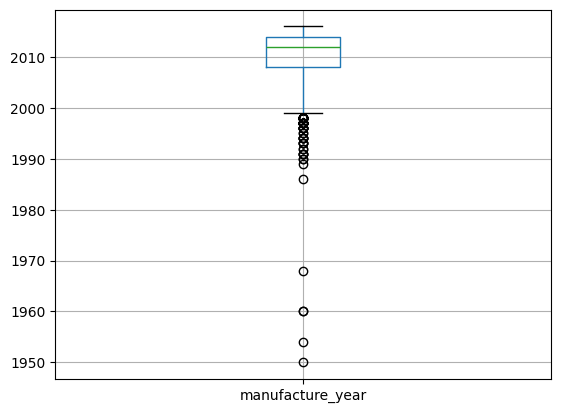

In [162]:
df2[['manufacture_year']].boxplot()
plt.show()

In [163]:
Q1=df2[['manufacture_year']].quantile(0.25)
Q1
Q3=df2[['manufacture_year']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_manufacture_year=(df2[['manufacture_year']][(df2[['manufacture_year']]>LL)&(df2[['manufacture_year']]<UL)])

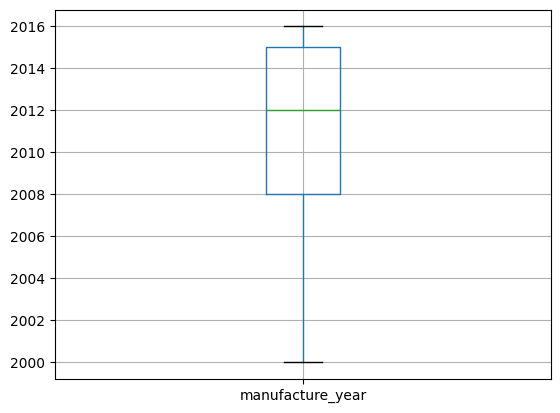

In [164]:
df2_manufacture_year.boxplot()
plt.show()

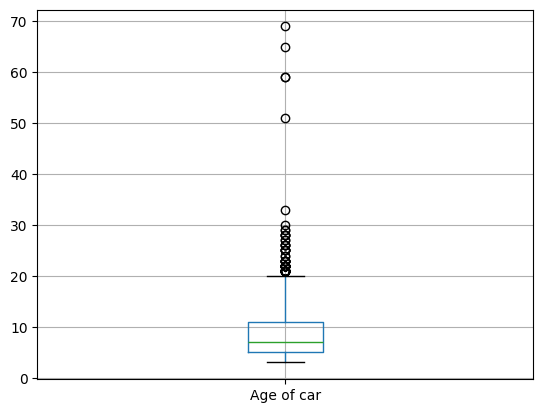

In [165]:
df2[['Age of car']].boxplot()
plt.show()

In [166]:
Q1=df2[['Age of car']].quantile(0.25)
Q1
Q3=df2[['Age of car']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_age_of_car=(df2[['Age of car']][(df2[['Age of car']]>LL)&(df2[['Age of car']]<UL)])

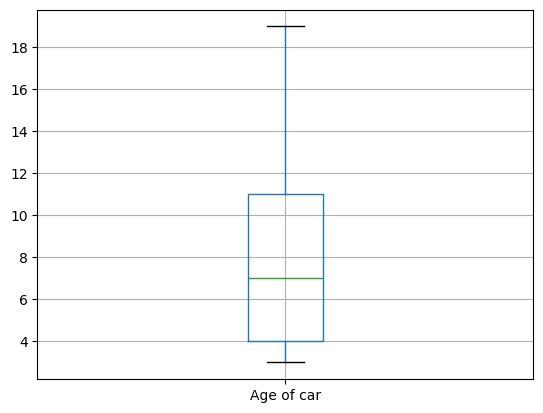

In [167]:
df2_age_of_car.boxplot()
plt.show()

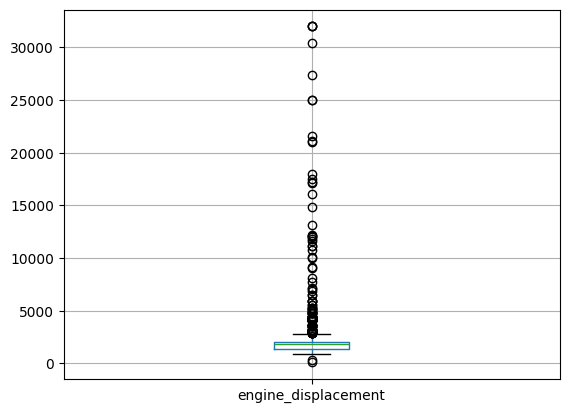

In [168]:
df2[['engine_displacement']].boxplot()
plt.show()

In [169]:
Q1=df2[['engine_displacement']].quantile(0.25)
Q1
Q3=df2[['engine_displacement']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_displacement=(df2[['engine_displacement']][(df2[['engine_displacement']]>LL)&(df2[['engine_displacement']]<UL)])

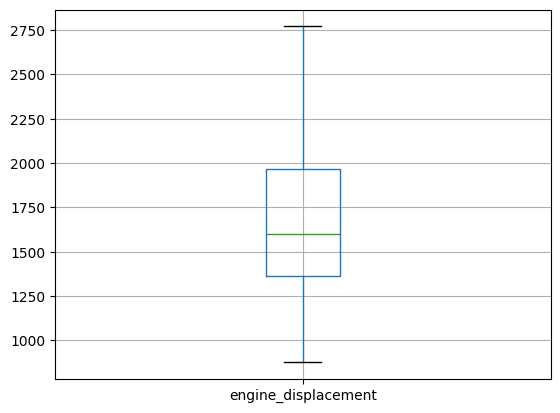

In [170]:
df2_engine_displacement.boxplot()
plt.show()

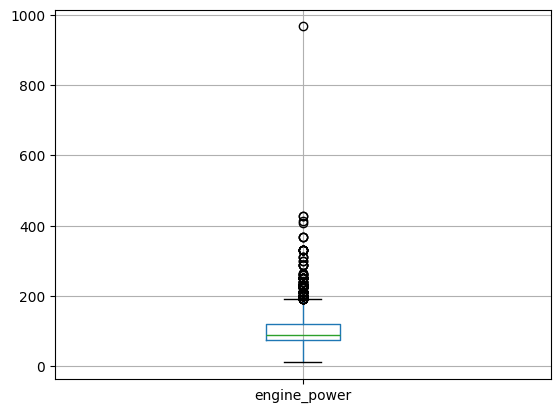

In [171]:
df2[['engine_power']].boxplot()
plt.show()

In [172]:
Q1=df2[['engine_power']].quantile(0.25)
Q1
Q3=df2[['engine_power']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_power=(df2[['engine_power']][(df2[['engine_power']]>LL)&(df2[['engine_power']]<UL)])

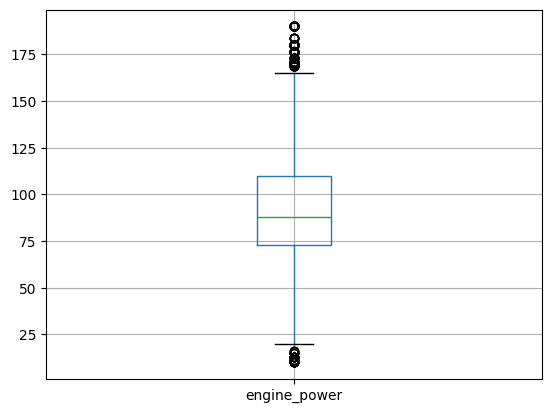

In [173]:
df2_engine_power.boxplot()
plt.show()

In [174]:
Q1=df2_engine_power.quantile(0.25)
Q1
Q3=df2_engine_power.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_engine_power1=(df2_engine_power[(df2_engine_power>LL)&(df2_engine_power<UL)])

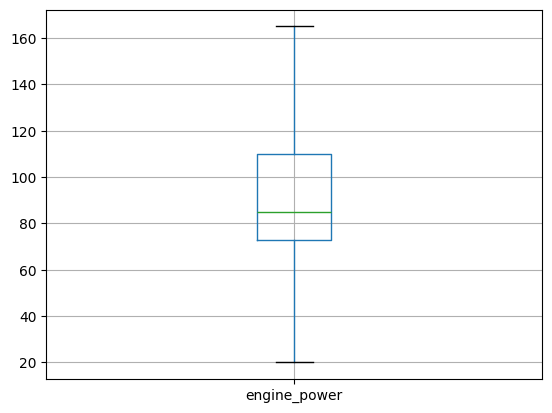

In [175]:
df2_engine_power1.boxplot()
plt.show()

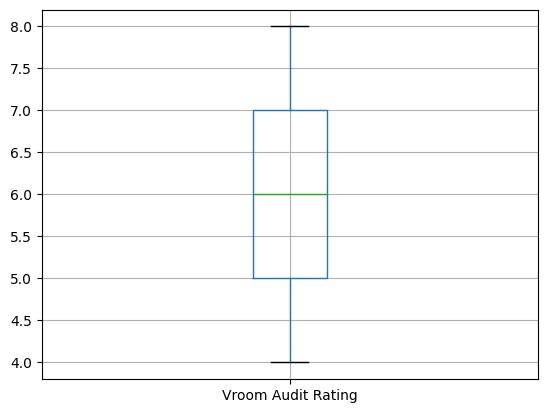

In [176]:
df2[['Vroom Audit Rating']].boxplot()
plt.show()

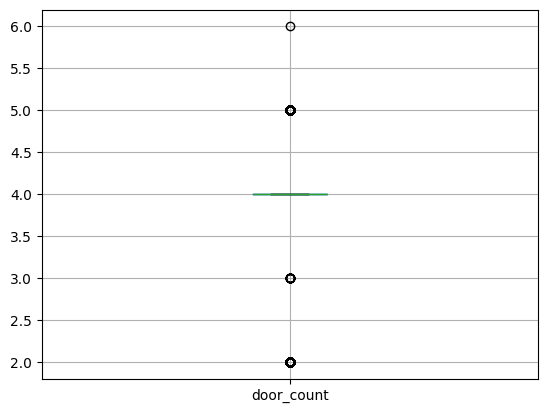

In [177]:
df2[['door_count']].boxplot()
plt.show()

In [178]:
Q1=df2[['door_count']].quantile(0.25)
Q1
Q3=df2[['door_count']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_door_count=(df2[['door_count']][(df2[['door_count']]>LL)&(df2[['door_count']]<UL)])

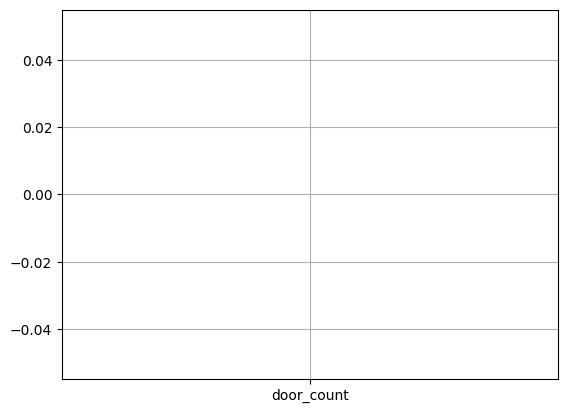

In [179]:
df2_door_count.boxplot()
plt.show()

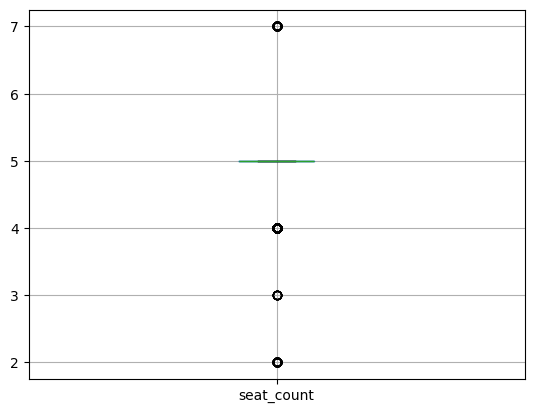

In [180]:
df2[['seat_count']].boxplot()
plt.show()

In [181]:
Q1=df2[['seat_count']].quantile(0.25)
Q1
Q3=df2[['seat_count']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_seat_count=(df2[['seat_count']][(df2[['seat_count']]>LL)&(df2[['seat_count']]<UL)])

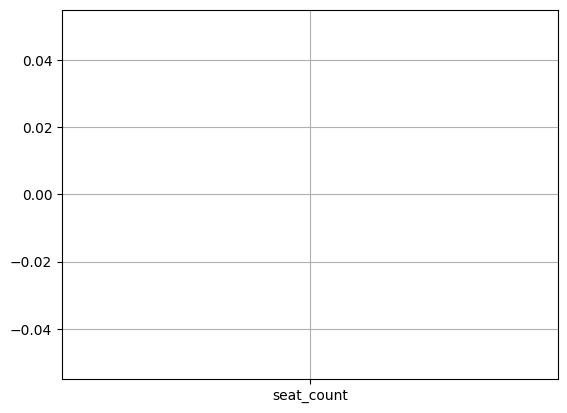

In [182]:
df2_seat_count.boxplot()
plt.show()

In [183]:
df3=pd.concat([df2[['Maker']],df2[['model']],df2[['Location']],df2[['Owner Type']],df2[['transmission']],df2[['fuel_type']],df2[['Id']],df2_distance1,df2_manufacture_year,df2_age_of_car,df2_engine_displacement,df2_engine_power1,df2[['Vroom Audit Rating']],df2[['door_count']],df2[['seat_count']]],axis=1)
df3

Maker  model  Location  Owner Type  transmission  fuel_type     Id  \
0         6      8         9           0             1          1  11001   
1         6     14         3           3             1          0  11002   
2         6      8         3           2             1          0  11003   
3         0     10         4           1             0          0  11004   
4         0     17         2           3             0          1  11005   
...     ...    ...       ...         ...           ...        ...    ...   
5610      6      8         9           0             1          0  16611   
5611      6     16         0           0             1          0  16612   
5612      6      8         1           2             1          0  16613   
5613      5     13         6           3             1          1  16614   
5614      3      5         6           2             1          1  16615   

      Distance   manufacture_year  Age of car  engine_displacement  \
0      150000.0            2007.0        12.0               1595.0   
1       29376.0            2014.0         5.0               1598.0   
2       30563.0            2014.0         5.0               1968.0   
3        8650.0            2015.0         4.0               1968.0   
4        6400.0            2015.0         4.0               1984.0   
...         ...               ...         ...                  ...   
5610   149976.0            2011.0         8.0               1968.0   
5611        NaN            2005.0        14.0               1896.0   
5612   230800.0            2005.0        14.0               1896.0   
5613    63480.0            2011.0         8.0               1997.0   
5614    75000.0            2011.0         8.0               1396.0   

      engine_power  Vroom Audit Rating  door_count  seat_count  
0             75.0                   5           4           5  
1             77.0                   4           4           5  
2            110.0                   5           5           5  
3            110.0                   8           4           5  
4              NaN                   4           2           5  
...            ...                 ...         ...         ...  
5610         103.0                   8           4           5  
5611          96.0                   6           4           5  
5612          77.0                   7           5           5  
5613         104.0                   5           4           7  
5614          80.0                   4           4           5  

[5615 rows x 15 columns]

In [184]:
df3.isnull().sum()

Maker                    0
model                    0
Location                 0
Owner Type               0
transmission             0
fuel_type                0
Id                       0
Distance                70
manufacture_year       145
Age of car             145
engine_displacement    540
engine_power           523
Vroom Audit Rating       0
door_count               0
seat_count               0
dtype: int64

In [185]:
df3.dropna(subset=['Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power'],inplace=True)

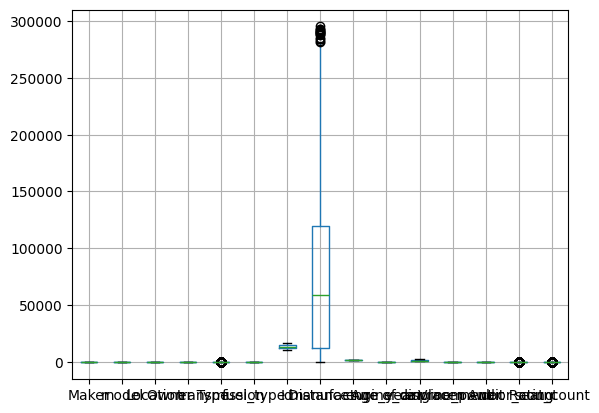

In [186]:
df3.boxplot()
plt.show()

In [187]:
df3.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
dtype: int64

In [188]:
df3.dtypes

Maker                    int64
model                    int64
Location                 int64
Owner Type               int64
transmission             int64
fuel_type                int64
Id                       int64
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
Vroom Audit Rating       int64
door_count               int64
seat_count               int64
dtype: object

In [189]:
df3['manufacture_year']=df3['manufacture_year'].astype(int)
df3['Distance ']=df3['Distance '].astype(int)
df3['Age of car']=df3['Age of car'].astype(int)
df3['engine_displacement']=df3['engine_displacement'].astype(int)
df3['engine_power']=df3['engine_power'].astype(int)

In [190]:
df3.dtypes

Maker                  int64
model                  int64
Location               int64
Owner Type             int64
transmission           int64
fuel_type              int64
Id                     int64
Distance               int64
manufacture_year       int64
Age of car             int64
engine_displacement    int64
engine_power           int64
Vroom Audit Rating     int64
door_count             int64
seat_count             int64
dtype: object

In [191]:
df3.shape

(4782, 15)

In [192]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [193]:
df3_StandardScaler=pd.DataFrame(ss.fit_transform(df3),columns=df3.columns)

In [194]:
df3_StandardScaler.shape

(4782, 15)

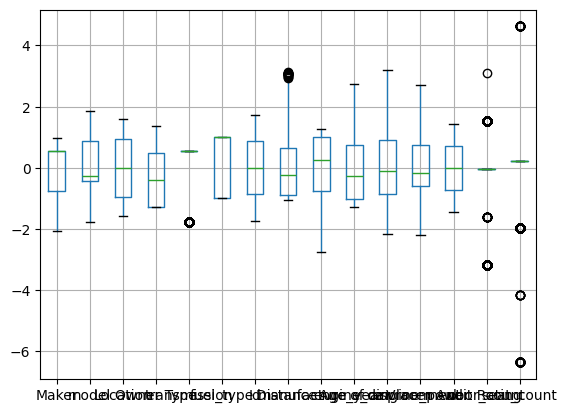

In [195]:
df3_StandardScaler.boxplot()
plt.show()

In [196]:
df3_StandardScaler.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count'],
      dtype='object')

In [197]:
df3_StandardScaler.dtypes

Maker                  float64
model                  float64
Location               float64
Owner Type             float64
transmission           float64
fuel_type              float64
Id                     float64
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
Vroom Audit Rating     float64
door_count             float64
seat_count             float64
dtype: object

In [198]:
df3_StandardScaler.describe()

Maker         model      Location    Owner Type  transmission  \
count  4.782000e+03  4.782000e+03  4.782000e+03  4.782000e+03  4.782000e+03   
mean   3.863260e-17 -6.240651e-17  6.760706e-17 -8.395162e-17 -8.172282e-18   
std    1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00  1.000105e+00   
min   -2.054375e+00 -1.755849e+00 -1.575544e+00 -1.296135e+00 -1.781228e+00   
25%   -7.569607e-01 -4.455895e-01 -9.429983e-01 -1.296135e+00  5.614103e-01   
50%    5.404537e-01 -2.818071e-01  5.820160e-03 -4.130865e-01  5.614103e-01   
75%    5.404537e-01  8.646696e-01  9.546386e-01  4.699620e-01  5.614103e-01   
max    9.729252e-01  1.847364e+00  1.587184e+00  1.353011e+00  5.614103e-01   

          fuel_type            Id     Distance   manufacture_year  \
count  4.782000e+03  4.782000e+03  4.782000e+03      4.782000e+03   
mean   6.983586e-17  4.754782e-16 -7.577934e-17     -1.110093e-14   
std    1.000105e+00  1.000105e+00  1.000105e+00      1.000105e+00   
min   -1.001674e+00 -1.732424e+00 -1.059022e+00     -2.749832e+00   
25%   -1.001674e+00 -8.639288e-01 -8.857084e-01     -7.425129e-01   
50%    9.983285e-01 -4.080115e-03 -2.190456e-01      2.611467e-01   
75%    9.983285e-01  8.644150e-01  6.422523e-01      1.013891e+00   
max    9.983285e-01  1.734763e+00  3.142605e+00      1.264806e+00   

         Age of car  engine_displacement  engine_power  Vroom Audit Rating  \
count  4.782000e+03         4.782000e+03  4.782000e+03        4.782000e+03   
mean  -4.754782e-17         1.493299e-16  5.572010e-17        9.806738e-17   
std    1.000105e+00         1.000105e+00  1.000105e+00        1.000105e+00   
min   -1.264806e+00        -2.160644e+00 -2.185452e+00       -1.430505e+00   
25%   -1.013891e+00        -8.632131e-01 -5.982433e-01       -7.119465e-01   
50%   -2.611467e-01        -1.135551e-01 -1.653682e-01        6.611576e-03   
75%    7.425129e-01         9.255188e-01  7.364549e-01        7.251697e-01   
max    2.749832e+00         3.192846e+00  2.720466e+00        1.443728e+00   

         door_count    seat_count  
count  4.782000e+03  4.782000e+03  
mean  -4.524472e-16 -6.062347e-16  
std    1.000105e+00  1.000105e+00  
min   -3.174501e+00 -6.358920e+00  
25%   -3.057146e-02  2.315341e-01  
50%   -3.057146e-02  2.315341e-01  
75%   -3.057146e-02  2.315341e-01  
max    3.113358e+00  4.625170e+00

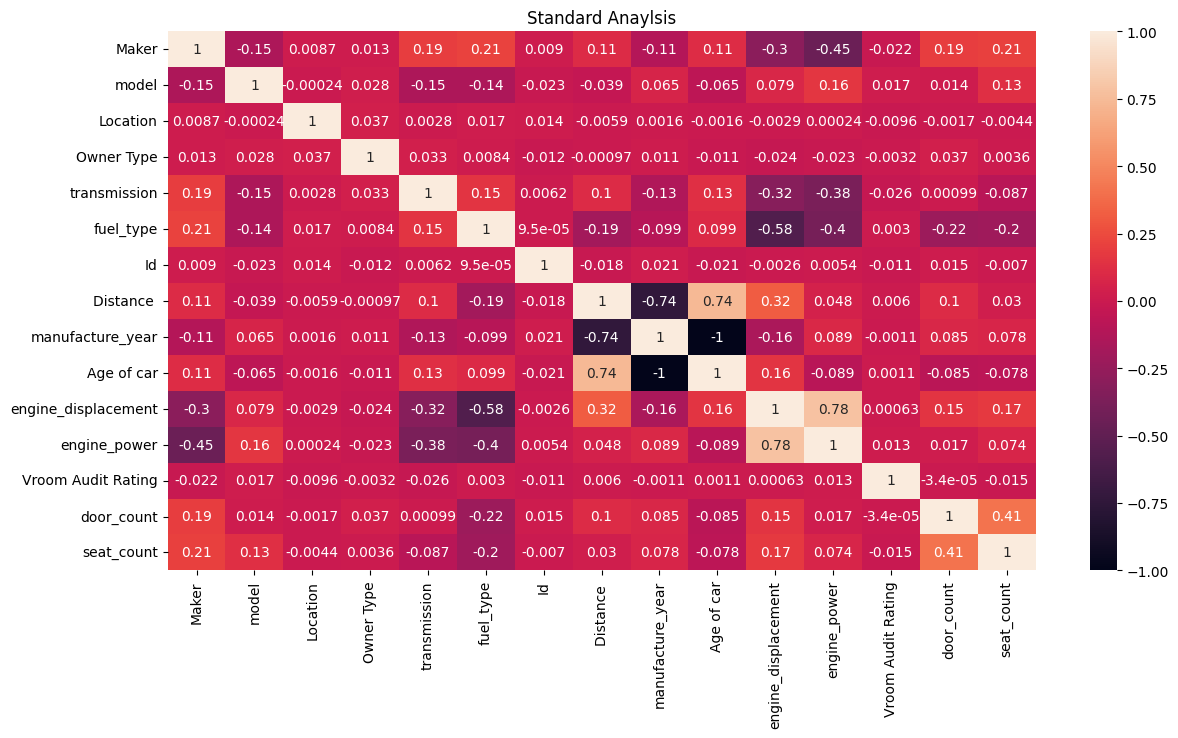

In [199]:
plt.figure(figsize=(14,7))
sns.heatmap(df3_StandardScaler.corr(),annot=True)
plt.title('Standard Anaylsis')
plt.show()

In [200]:
df3_StandardScaler.corr()

Maker     model  Location  Owner Type  transmission  \
Maker                1.000000 -0.148336  0.008667    0.012821      0.188951   
model               -0.148336  1.000000 -0.000245    0.028066     -0.147485   
Location             0.008667 -0.000245  1.000000    0.037329      0.002775   
Owner Type           0.012821  0.028066  0.037329    1.000000      0.032918   
transmission         0.188951 -0.147485  0.002775    0.032918      1.000000   
fuel_type            0.213251 -0.144252  0.016677    0.008357      0.148885   
Id                   0.009027 -0.023026  0.013844   -0.011774      0.006177   
Distance             0.108406 -0.038703 -0.005938   -0.000971      0.102096   
manufacture_year    -0.110912  0.064802  0.001617    0.011223     -0.132475   
Age of car           0.110912 -0.064802 -0.001617   -0.011223      0.132475   
engine_displacement -0.304134  0.079354 -0.002853   -0.024454     -0.315466   
engine_power        -0.447043  0.158992  0.000244   -0.023235     -0.375919   
Vroom Audit Rating  -0.022354  0.016777 -0.009591   -0.003240     -0.025537   
door_count           0.192095  0.014105 -0.001693    0.036719      0.000991   
seat_count           0.207050  0.125290 -0.004399    0.003557     -0.086938   

                     fuel_type        Id  Distance   manufacture_year  \
Maker                 0.213251  0.009027   0.108406         -0.110912   
model                -0.144252 -0.023026  -0.038703          0.064802   
Location              0.016677  0.013844  -0.005938          0.001617   
Owner Type            0.008357 -0.011774  -0.000971          0.011223   
transmission          0.148885  0.006177   0.102096         -0.132475   
fuel_type             1.000000  0.000095  -0.187717         -0.099310   
Id                    0.000095  1.000000  -0.017563          0.021422   
Distance             -0.187717 -0.017563   1.000000         -0.736031   
manufacture_year     -0.099310  0.021422  -0.736031          1.000000   
Age of car            0.099310 -0.021422   0.736031         -1.000000   
engine_displacement  -0.577017 -0.002609   0.315226         -0.155228   
engine_power         -0.395299  0.005394   0.047630          0.088548   
Vroom Audit Rating    0.003016 -0.010525   0.006007         -0.001123   
door_count           -0.220626  0.014991   0.102285          0.085022   
seat_count           -0.203583 -0.006974   0.030154          0.077512   

                     Age of car  engine_displacement  engine_power  \
Maker                  0.110912            -0.304134     -0.447043   
model                 -0.064802             0.079354      0.158992   
Location              -0.001617            -0.002853      0.000244   
Owner Type            -0.011223            -0.024454     -0.023235   
transmission           0.132475            -0.315466     -0.375919   
fuel_type              0.099310            -0.577017     -0.395299   
Id                    -0.021422            -0.002609      0.005394   
Distance               0.736031             0.315226      0.047630   
manufacture_year      -1.000000            -0.155228      0.088548   
Age of car             1.000000             0.155228     -0.088548   
engine_displacement    0.155228             1.000000      0.784129   
engine_power          -0.088548             0.784129      1.000000   
Vroom Audit Rating     0.001123             0.000635      0.012698   
door_count            -0.085022             0.153049      0.016941   
seat_count            -0.077512             0.174014      0.073669   

                     Vroom Audit Rating  door_count  seat_count  
Maker                         -0.022354    0.192095    0.207050  
model                          0.016777    0.014105    0.125290  
Location                      -0.009591   -0.001693   -0.004399  
Owner Type                    -0.003240    0.036719    0.003557  
transmission                  -0.025537    0.000991   -0.086938  
fuel_type                      0.003016   -0.220626   -0.203583  
Id     

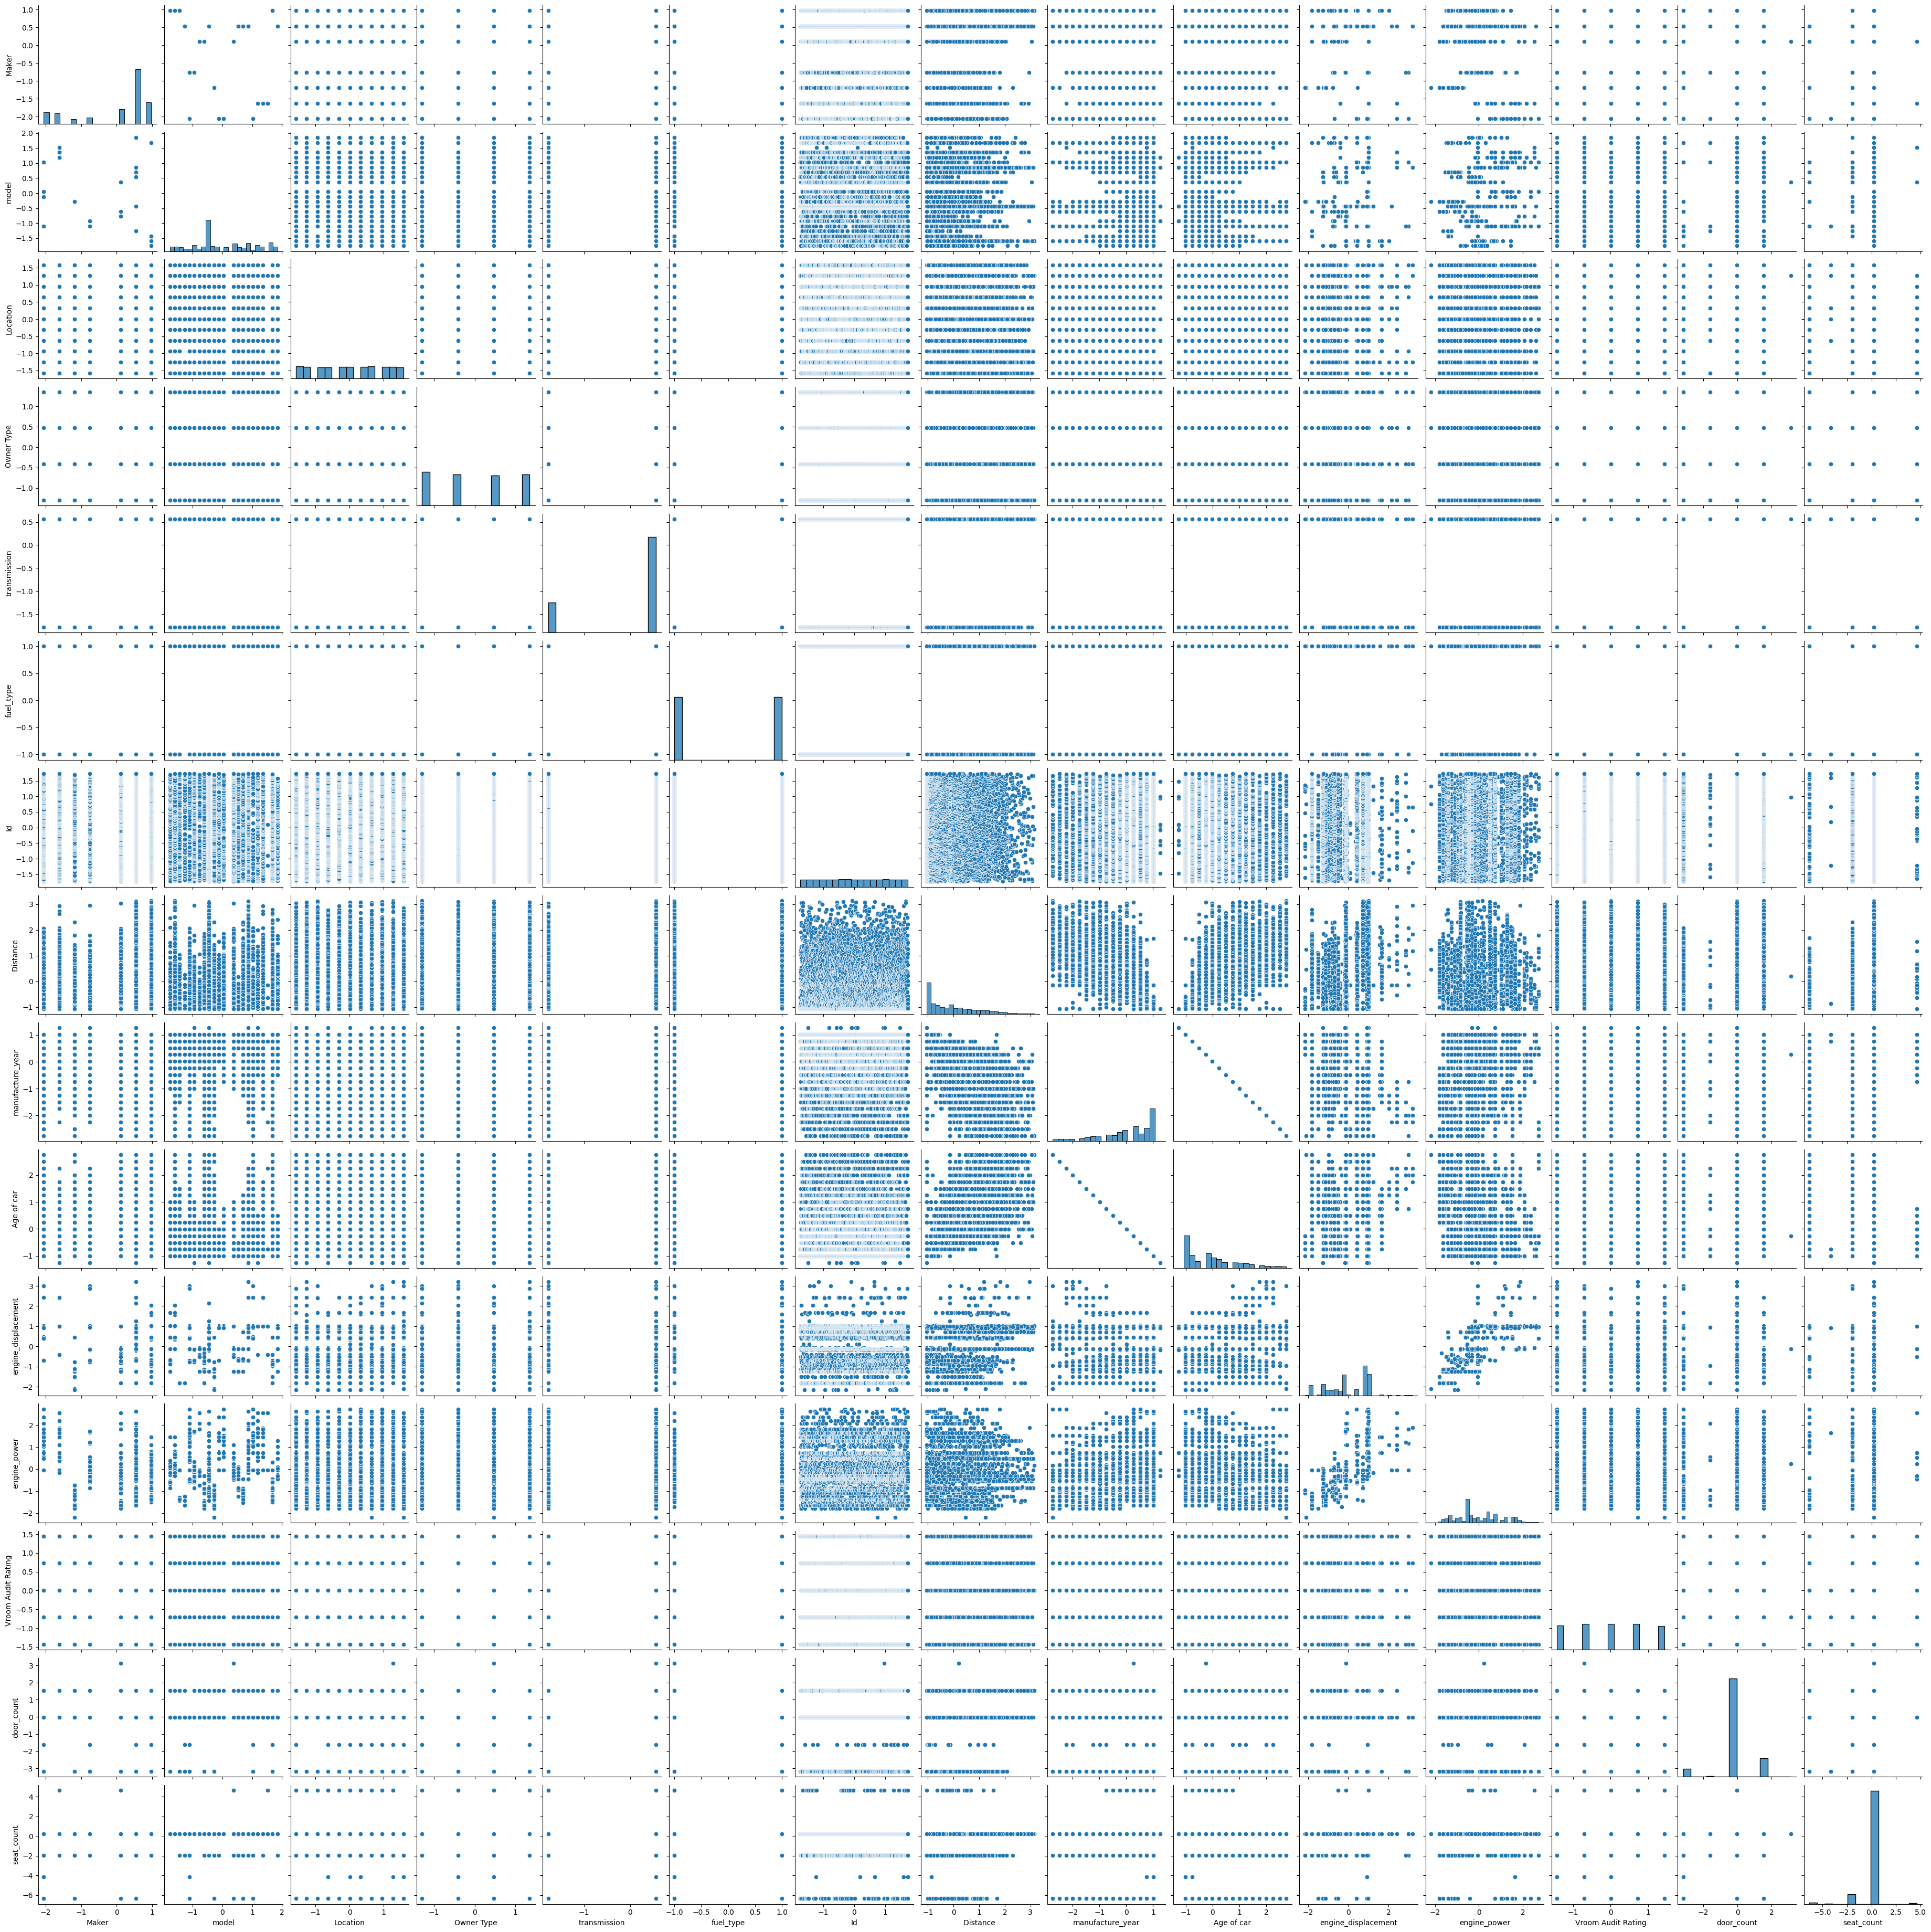

In [201]:
sns.pairplot(data=df3_StandardScaler)
plt.show()

In [202]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [203]:
x1=df3_StandardScaler

In [204]:
model.fit(x,y)

LinearRegression()

In [207]:
y_predict=pd.DataFrame(model.predict(x1),columns=['y_predicted'])

In [208]:
y_predict

y_predicted
0     2.462042e+05
1     1.113212e+06
2     1.335201e+06
3     1.899708e+06
4     1.878297e+06
...            ...
4777  1.834342e+06
4778  8.602444e+05
4779  1.438830e+05
4780  1.090566e+06
4781  7.838290e+05

[4782 rows x 1 columns]

In [213]:
df_ID=df3_StandardScaler[['Id']]

In [214]:
df_price=pd.concat([y_predict,df_ID],axis=1)

In [215]:
df_price

y_predicted        Id
0     2.462042e+05 -1.732424
1     1.113212e+06 -1.731806
2     1.335201e+06 -1.731189
3     1.899708e+06 -1.730571
4     1.878297e+06 -1.729336
...            ...       ...
4777  1.834342e+06  1.731057
4778  8.602444e+05  1.732292
4779  1.438830e+05  1.733528
4780  1.090566e+06  1.734145
4781  7.838290e+05  1.734763

[4782 rows x 2 columns]